# FIT5196  Assessment 2
#### Student Name: Hristina Todorovska
#### Student ID: 29193869

Date: 19/05/2019

Version: 1.0

Environment: Python 3.6.4 and Jupyter notebook

Libraries used:


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import time
import seaborn as sns
%matplotlib inline
from numpy import mean, std, abs
from collections import defaultdict
from heapq import heapify, heappop, heappush
from datetime import datetime,timedelta
from sklearn.linear_model import LinearRegression

# 1.   Dirty Dataset

In this part I am going to clean the dirty dataset, I will try to identify potetial bugs and will fix them.

In [2]:
uber = pd.read_csv("29193869_dirty_data.csv")
uber.head()

Unnamed: 0  Uber Type  Origin Region  Destination Region  \
0  ID3268182362          1              2                   7   
1  ID5214522894          2              2                   7   
2  ID3255906293          1              2                   7   
3  ID3262306542          1              5                   3   
4  ID1236493597          0              6                   8   

   Origin Latitude  Origin Longitude  Destination Latitude  \
0       -37.819723        144.946810            -37.861835   
1       -37.823397        144.935580            -37.861835   
2       -37.822488        144.940021            -37.861835   
3       -37.799764        144.935714            -37.824681   
4       -37.787433        144.980377            -37.815834   

   Destination Longitude  Journey Distance(m) Departure Date Departure Time  \
0             144.905716               9151.0     2018-04-27       13:55:25   
1             144.905716               9986.9     2018-04-18       14:22:32   
2             144.905716               9549.0     2018-03-12       12:21:07   
3             145.005716               9658.0     2018-02-12       02:56:01   
4             145.046450               8361.0     2018-03-18       06:41:07   

   Travel Time(s) Arrival Time   Fare$  
0         3081.66     14:46:46   23.46  
1         3317.70     15:17:49  281.33  
2         3270.18     13:15:37   24.02  
3         2098.02      3:30:59   25.03  
4         2438.22      7:21:45   13.59

I will rename column Unnamed: 0 into Id for easyer manipulation with the data. In the rowFixed list I will save the index f the rows which I will change.

In [3]:
uber.rename(columns={'Unnamed: 0':'Id'}, inplace=True)
rowFixed = []

``checkInArray`` method I will use to check if I have changed specific row.

In [4]:
def checkInArray(row, array):
    """
    :param row: (int) 
    :param array: (list) 
    :return print
    """
    if row in array:
        print("Row already changed")
    else:
        print("No")

In [5]:
print (uber.shape) 

(309, 14)


We are working with 309 observations of 14 variables.

- Categorical variables: <br>
Uber Type <br>
Origin region <br>
Destination region

In [6]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 14 columns):
Id                       309 non-null object
Uber Type                309 non-null int64
Origin Region            309 non-null int64
Destination Region       309 non-null int64
Origin Latitude          309 non-null float64
Origin Longitude         309 non-null float64
Destination Latitude     309 non-null float64
Destination Longitude    309 non-null float64
Journey Distance(m)      309 non-null float64
Departure Date           309 non-null object
Departure Time           309 non-null object
Travel Time(s)           309 non-null float64
Arrival Time             309 non-null object
Fare$                    309 non-null float64
dtypes: float64(7), int64(3), object(4)
memory usage: 33.9+ KB


In [7]:
uber.describe()

Uber Type  Origin Region  Destination Region  Origin Latitude  \
count  309.000000     309.000000          309.000000       309.000000   
mean     0.763754       4.799353            5.391586       -36.616508   
std      0.763948       2.570790            2.588447         9.561853   
min      0.000000       1.000000            1.000000       -38.110916   
25%      0.000000       2.000000            3.000000       -37.821903   
50%      1.000000       5.000000            6.000000       -37.814332   
75%      1.000000       7.000000            8.000000       -37.803969   
max      3.000000       9.000000            9.000000        37.861835   

       Origin Longitude  Destination Latitude  Destination Longitude  \
count        309.000000            309.000000             309.000000   
mean         144.940314            -36.633611             144.923616   
std            0.097024              9.563894               0.115919   
min          144.654173            -38.110916             144.654173   
25%          144.928776            -37.861835             144.905716   
50%          144.957147            -37.815834             144.948675   
75%          144.990416            -37.805029             144.990822   
max          145.046450             37.821461             145.046450   

       Journey Distance(m)  Travel Time(s)        Fare$  
count           309.000000      309.000000   309.000000  
mean          16428.149515     4320.414498    77.522136  
std           16922.402360     4102.451178   181.143681  
min             866.000000      213.780000     3.450000  
25%            5540.000000     1452.480000    12.860000  
50%            8737.000000     2703.240000    20.840000  
75%           15151.000000     4917.480000    48.930000  
max           51061.000000    13204.980000  1045.060000

In [8]:
uber.describe(include=['O'])

Id Departure Date Departure Time Arrival Time
count            309            309            309          309
unique           309            166            308          309
top     ID5859832962     2018-05-14       21:45:52      0:47:04
freq               1              5              2            1

In [9]:
uber['Uber Type'].value_counts()

0    132
1    121
2     53
3      3
Name: Uber Type, dtype: int64

In [10]:
uber['Origin Region'].value_counts()

2    39
1    39
6    38
7    34
4    34
3    34
8    33
5    31
9    27
Name: Origin Region, dtype: int64

In [11]:
uber['Destination Region'].value_counts()


7    47
9    43
8    37
6    36
2    32
4    30
3    29
5    28
1    27
Name: Destination Region, dtype: int64

## Check ID

From Assessment specificatin we know that Id is unique. I am going to check if there are duplicate ID. 

In [12]:
print(any(uber['Id'].duplicated()))

False


No duplicate Id .

## Check Uber Types

- We know that we have 3 types of Uber: <br>
Uber pool <br>
Uberx <br>
Uber Black <br>


In [13]:
uber['Uber Type'].value_counts()

0    132
1    121
2     53
3      3
Name: Uber Type, dtype: int64

From the above we can see that there are some mistakes that need to be fixed, because the dataset is presenting 4 types of Uber:<br>
``` 
0  132 rows
1  121 rows 
2  53 rows
3  3 rows 
```
<br> type 3 is extra but lets find what should be instead of 3. <br>
In the next part I am goig to check separatly each Uber Type.

### - Uber Type 0

In [14]:
uber['Id'][uber['Uber Type']==0].head(15)

4     ID1236493597
7     ID1974210497
9     ID1840718349
10    ID1668111100
13    ID1509574592
14    ID1183050256
15    ID1851650493
17    ID1566639534
18    ID1452968106
19    ID1633943969
23    ID1985521018
26    ID1322073924
27    ID1847550687
32    ID1196838103
36    ID1833086277
Name: Id, dtype: object

I can notice that the Id of Uber Type 0 starts with ID1.....

In [15]:
uber.loc[(uber['Id'].astype(str).str[2]=='1'),:]

Id  Uber Type  Origin Region  Destination Region  \
4    ID1236493597          0              6                   8   
7    ID1974210497          0              5                   8   
9    ID1840718349          0              2                   9   
10   ID1668111100          0              2                   6   
13   ID1509574592          0              9                   1   
14   ID1183050256          0              2                   7   
15   ID1851650493          0              7                   6   
17   ID1566639534          0              2                   6   
18   ID1452968106          0              1                   7   
19   ID1633943969          0              6                   9   
23   ID1985521018          0              1                   8   
26   ID1322073924          0              9                   7   
27   ID1847550687          0              9                   1   
32   ID1196838103          0              4                   6   
36   ID1833086277          0              9                   5   
40   ID1823057110          0              7                   7   
41   ID1241588538          0              1                   7   
45   ID1359751585          0              3                   8   
46   ID1190861925          0              5                   4   
47   ID1864456834          0              2                   9   
48   ID1188851341          0              4                   7   
49   ID1317322227          0              2                   9   
51   ID1739611706          0              9                   3   
55   ID1179217326          0              4                   9   
62   ID1477561777          0              7                   4   
63   ID1273790085          0              2                   9   
64   ID1849747536          0              8                   7   
68   ID1699807403          0              7                   3   
72   ID1817452236          0              2                   7   
76   ID1651107986          0              2                   1   
..            ...        ...            ...                 ...   
249  ID1569557804          0              5                   1   
251  ID1995983512          0              1                   5   
252  ID1569622072          0              5                   7   
253  ID1722348298          0              1                   6   
254  ID1382659563          0              2                   1   
257  ID1429023907          0              7                   9   
261  ID1604961854          0              5                   6   
262  ID1426977968          0              8                   5   
263  ID1601048392          0              8                   6   
264  ID1888930371          0              7                   6   
269  ID1678797747          0              1                   8   
270  ID1755125851          0              9                   4   
271  ID1257083466          0              2                   8   
273  ID1112200071          0              1                   4   
274  ID1875409605          0              1                   6   
276  ID1473195973          0              1                   6   
279  ID1890930406          0              6                   4   
284  ID1295870434          0              5                   4   
286  ID1486712225          0              9                   6   
287  ID1343689963          0              6                   8   
289  ID1136297160          0              2                   9   
290  ID1351717467          0              1                   2   
292  ID1465532261          0              4                   8   
294  ID1414201544          0              9                   8   
296  ID1715798037          0              7                   3   
298  ID1234872703          0              8                   7   
300  ID1883810967          0              1                   7   
302  ID1629901262          0              2                   

Now I will check if all Id for Uber Type 0 starts with ID1..

In [16]:
uber['Uber Type'].value_counts()

0    132
1    121
2     53
3      3
Name: Uber Type, dtype: int64

In [17]:
len(uber['Id'][(uber['Uber Type']==0)&(uber['Id'].astype(str).str[2]=='1')])

132

Now we know that all Ids of Uber Type 0 starts with ID1 ... <br>
But lets check if there are other Uber types that starts with ID1..

In [18]:
uber.loc[(uber['Uber Type']!=0)&(uber['Id'].astype(str).str[2]=='1'),:]

Id  Uber Type  Origin Region  Destination Region  \
129  ID1922747746          3              1                   5   
136  ID1771561215          2              4                   2   
138  ID1304167974          2              9                   8   
139  ID1950335272          3              2                   6   
146  ID1864580619          1              3                   5   
151  ID1359892658          2              3                   8   
152  ID1731799423          3              1                   3   

     Origin Latitude  Origin Longitude  Destination Latitude  \
129       -37.825306        144.957147            -37.796403   
136       -37.810568        145.015991            -37.821442   
138       -38.110916        144.654173            -37.815834   
139       -37.824351        144.943814            -37.787433   
146       -37.818441        144.968805            -37.796680   
151       -37.816084        144.972410            -37.807202   
152       -37.806479        144.955897            -37.812747   

     Destination Longitude  Journey Distance(m) Departure Date Departure Time  \
129             144.930983               4891.0     2018-05-16       15:17:59   
136             144.945078               7311.0     2018-06-07       02:15:56   
138             145.046450              51032.0     2018-06-14       19:34:59   
139             144.980377               6247.0     2018-04-07       03:35:17   
146             144.935370               6728.0     2018-01-10       22:06:49   
151             145.026637               5792.0     2018-04-07       12:56:27   
152             144.988401               3244.0     2018-03-27       09:19:20   

     Travel Time(s) Arrival Time  Fare$  
129         1187.58     15:37:46   7.71  
136         1715.94      2:44:31  13.32  
138        12681.06     23:06:20  27.83  
139         1671.06      4:03:08  15.53  
146         1627.08     22:33:56  13.20  
151         1452.48     13:20:39  13.04  
152          795.60      9:32:35   5.82

Yes we found 7, rows which Id starts with ID1 and it is ot Uber Type 0, s I wil change to Uber Type 0.

In [19]:
checkInArray(129,rowFixed)
checkInArray(136,rowFixed)
checkInArray(138,rowFixed)
checkInArray(139,rowFixed)
checkInArray(146,rowFixed)
checkInArray(151,rowFixed)
checkInArray(152,rowFixed)

No
No
No
No
No
No
No


In [20]:
rowFixed.append(129)
rowFixed.append(136)
rowFixed.append(138)
rowFixed.append(139)
rowFixed.append(146)
rowFixed.append(151)
rowFixed.append(152)
uber.loc[uber['Id']=='ID1922747746','Uber Type'] = 0
uber.loc[uber['Id']=='ID1771561215','Uber Type'] = 0
uber.loc[uber['Id']=='ID1304167974','Uber Type'] = 0
uber.loc[uber['Id']=='ID1950335272','Uber Type'] = 0
uber.loc[uber['Id']=='ID1864580619','Uber Type'] = 0
uber.loc[uber['Id']=='ID1359892658','Uber Type'] = 0
uber.loc[uber['Id']=='ID1731799423','Uber Type'] = 0

In [21]:
uber.loc[(uber['Uber Type']!=0)&(uber['Id'].astype(str).str[2]=='1'),:]

Empty DataFrame
Columns: [Id, Uber Type, Origin Region, Destination Region, Origin Latitude, Origin Longitude, Destination Latitude, Destination Longitude, Journey Distance(m), Departure Date, Departure Time, Travel Time(s), Arrival Time, Fare$]
Index: []

### - Uber Type 1

In [22]:
uber['Id'][uber['Uber Type']==1].head(10)

0     ID3268182362
2     ID3255906293
3     ID3262306542
6     ID3112152938
8     ID3967337574
11    ID3172727145
20    ID3827700457
21    ID3635883870
22    ID3539137572
24    ID3492234191
Name: Id, dtype: object

I can notice that the Id of Uber Type 1 starts with ID3.....

In [23]:
uber.loc[(uber['Id'].astype(str).str[2]=='3'),:]

Id  Uber Type  Origin Region  Destination Region  \
0    ID3268182362          1              2                   7   
2    ID3255906293          1              2                   7   
3    ID3262306542          1              5                   3   
6    ID3112152938          1              6                   5   
8    ID3967337574          1              4                   6   
11   ID3172727145          1              9                   8   
20   ID3827700457          1              7                   5   
21   ID3635883870          1              2                   9   
22   ID3539137572          1              3                   3   
24   ID3492234191          1              3                   9   
28   ID3537641795          1              3                   5   
29   ID3370393843          1              2                   3   
30   ID3991045388          1              4                   5   
31   ID3773820953          1              4                   3   
35   ID3718342467          1              3                   6   
37   ID3968339316          1              9                   7   
38   ID3398492283          1              6                   4   
39   ID3149315218          1              2                   1   
42   ID3575196756          1              5                   9   
43   ID3912220855          1              8                   6   
44   ID3383512742          1              7                   1   
50   ID3697833707          1              3                   8   
53   ID3974747199          1              7                   4   
54   ID3509737696          1              1                   9   
56   ID3968693914          1              8                   2   
58   ID3957034209          1              8                   3   
59   ID3598219610          1              5                   2   
60   ID3115230755          1              5                   8   
61   ID3966702046          1              9                   4   
66   ID3577912783          1              6                   5   
..            ...        ...            ...                 ...   
225  ID3978531968          1              3                   1   
226  ID3323972321          1              8                   1   
227  ID3776386424          1              1                   9   
231  ID3669287785          1              3                   9   
232  ID3761169869          1              7                   6   
233  ID3938165359          1              6                   3   
235  ID3848350768          1              7                   2   
236  ID3592160826          1              2                   7   
239  ID3637143778          1              1                   7   
240  ID3143157752          1              4                   6   
241  ID3974871603          1              7                   4   
245  ID3328404385          1              2                   9   
246  ID3531307361          1              5                   2   
250  ID3515341871          1              3                   9   
255  ID3832469187          1              3                   9   
259  ID3529346310          1              1                   7   
265  ID3777912717          1              5                   3   
267  ID3213459318          1              1                   5   
278  ID3543508612          1              8                   2   
280  ID3918329778          1              1                   2   
282  ID3465099216          1              5                   2   
283  ID3759131558          1              6                   5   
285  ID3743195429          1              1                   3   
288  ID3804444776          1              3                   1   
293  ID3466046423          1              5                   7   
295  ID3552445779          1              3                   9   
299  ID3818570242          1              3                   9   
301  ID3613289637          1              6                   

Now I will check if all Id for Uber Type 1 starts with ID3..

In [24]:
uber['Uber Type'].value_counts()

0    139
1    120
2     50
Name: Uber Type, dtype: int64

In [25]:
len(uber['Id'][(uber['Uber Type']==1)&(uber['Id'].astype(str).str[2]=='3')])

119

Now we know that 119 of 120 Ids  of Uber Type 1 starts with ID3 ... <br>
But lets check if there are other Uber types that starts with ID3..

In [26]:
uber.loc[(uber['Uber Type']!=1)&(uber['Id'].astype(str).str[2]=='3'),:]

Id  Uber Type  Origin Region  Destination Region  \
143  ID3589203030          2              9                   7   

     Origin Latitude  Origin Longitude  Destination Latitude  \
143       -38.110916        144.654173            -37.861835   

     Destination Longitude  Journey Distance(m) Departure Date Departure Time  \
143             144.905716              50797.0     2018-05-17       05:36:12   

     Travel Time(s) Arrival Time  Fare$  
143        13204.98      9:16:16  69.46

Yes we fund 1 row where Id starts with ID3.. and Uber Type is ot 3  s I will change that row to uber Type 3.

In [27]:
checkInArray(143,rowFixed)

No


In [28]:
rowFixed.append(143)
uber.loc[uber['Id']=='ID3589203030','Uber Type'] = 1

In [29]:
uber.loc[(uber['Uber Type']!=1)&(uber['Id'].astype(str).str[2]=='3'),:]

Empty DataFrame
Columns: [Id, Uber Type, Origin Region, Destination Region, Origin Latitude, Origin Longitude, Destination Latitude, Destination Longitude, Journey Distance(m), Departure Date, Departure Time, Travel Time(s), Arrival Time, Fare$]
Index: []

In [30]:
uber.loc[(uber['Uber Type']==1)&(uber['Id'].astype(str).str[2]!='3'),:]

Id  Uber Type  Origin Region  Destination Region  \
137  ID5558276740          1              2                   8   

     Origin Latitude  Origin Longitude  Destination Latitude  \
137       -37.820153        144.942844            -37.807202   

     Destination Longitude  Journey Distance(m) Departure Date Departure Time  \
137             145.026637               8592.0     2018-02-25       10:55:40   

     Travel Time(s) Arrival Time   Fare$  
137         2018.64     11:29:18  176.77

This row 137 is assigned t Uber Type 1 but it does t belong to Uber Type 1.

### - Uber Type 2

In [31]:
uber['Id'][uber['Uber Type']==2].head(10)

1     ID5214522894
5     ID5883550230
12    ID5744689138
16    ID5937395172
25    ID5168399254
33    ID5115959569
34    ID5661298102
52    ID5384730113
57    ID5961624617
65    ID5641132817
Name: Id, dtype: object

I can notice that the Id of Uber Type 2 starts with ID5.....

In [32]:
uber.loc[(uber['Id'].astype(str).str[2]=='5'),:]

Id  Uber Type  Origin Region  Destination Region  \
1    ID5214522894          2              2                   7   
5    ID5883550230          2              6                   4   
12   ID5744689138          2              8                   6   
16   ID5937395172          2              7                   9   
25   ID5168399254          2              9                   1   
33   ID5115959569          2              3                   5   
34   ID5661298102          2              3                   7   
52   ID5384730113          2              7                   1   
57   ID5961624617          2              6                   3   
65   ID5641132817          2              2                   6   
75   ID5378277724          2              2                   8   
89   ID5554234742          2              6                   3   
91   ID5752276249          2              8                   1   
92   ID5175682088          2              9                   2   
100  ID5917391894          2              2                   9   
103  ID5668865385          2              1                   8   
106  ID5648745568          2              9                   2   
108  ID5848322811          2              6                   9   
112  ID5605567491          2              6                   7   
134  ID5283846506          2              8                   9   
135  ID5771841040          2              8                   9   
137  ID5558276740          1              2                   8   
144  ID5579827132          2              4                   6   
166  ID5665931463          2              1                   7   
167  ID5354460498          2              9                   6   
188  ID5790736014          2              6                   7   
189  ID5536391930          2              5                   4   
197  ID5750165478          2              1                   8   
209  ID5363904111          2              8                   1   
213  ID5234265422          2              4                   8   
217  ID5596079651          2              4                   6   
218  ID5861189327          2              5                   3   
220  ID5306900359          2              7                   5   
222  ID5667028577          2              4                   9   
228  ID5967424782          2              5                   9   
243  ID5448802909          2              1                   7   
247  ID5780569208          2              5                   3   
256  ID5271056473          2              4                   6   
258  ID5859832962          2              5                   2   
260  ID5264461711          2              7                   2   
266  ID5455367384          2              2                   6   
268  ID5850349090          2              2                   8   
272  ID5923042142          2              4                   6   
275  ID5500773697          2              8                   9   
277  ID5726306340          2              6                   2   
281  ID5214177337          2              6                   2   
291  ID5488094010          2              3                   5   
297  ID5743647162          2              4                   3   
303  ID5663120029          2              7                   4   
304  ID5736254699          2              1                   7   

     Origin Latitude  Origin Longitude  Destination Latitude  \
1         -37.823397        144.935580            -37.861835   
5         -37.787433        144.980377            -37.807601   
12        -37.815834        145.046450            -37.773803   
16        -37.861835        144.905716            -38.110916   
25        -38.110916        144.654173            -37.801179   
33        -37.821903        144.969011            -37.813232   
34        -37.817758        145.006987            -37.810568   
52        -37.861835        144.905716            -37.800349   
57         37.787442 

Now I will check if all Id for Uber Type 2 starts with ID5..

In [33]:
uber['Uber Type'].value_counts()

0    139
1    121
2     49
Name: Uber Type, dtype: int64

In [34]:
len(uber['Id'][(uber['Uber Type']==2)&(uber['Id'].astype(str).str[2]=='5')])

49

In [35]:
uber['Id'][(uber['Uber Type']!=2)&(uber['Id'].astype(str).str[2]=='5')]

137    ID5558276740
Name: Id, dtype: object

In [36]:
checkInArray(137,rowFixed)

No


In [37]:
rowFixed.append(137)
uber.loc[uber['Id']=='ID5558276740','Uber Type'] = 2

We can see that we eliminate Uber Type 3 durig the change.

We can consider Uber Type coumn as clean. <br>
Now we have dataset where 
```
Id        Uber Type
------------------------
ID1...     0
ID3...     1
ID5...     2
```

## Check Latitude and Longitude

From the specification we know that Origin latitude, Origin longitude, Destination latitude and Destination longitude are coming from nodes.csv file <br>
In this part I will read the data from nodes.csv file

In [38]:
nodes = pd.read_csv("nodes.csv")
nodes.head()

Unnamed: 0        lat         lon
0   711327755 -37.807675  144.955873
1   711327756 -37.807094  144.955978
2   711327759 -37.807301  144.957817
3   711327760 -37.807885  144.957719
4   777781264 -37.805221  144.952173

In [39]:
nodes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17117 entries, 0 to 17116
Data columns (total 3 columns):
Unnamed: 0    17117 non-null int64
lat           17117 non-null float64
lon           17117 non-null float64
dtypes: float64(2), int64(1)
memory usage: 401.3 KB


 ###  -Latitude interval

In [40]:
nodes['lat'].describe()

count    17117.000000
mean       -37.812451
std          0.008005
min        -38.110916
25%        -37.818766
50%        -37.812767
75%        -37.806185
max        -37.739636
Name: lat, dtype: float64

Latitude value should be in the interval :<br>
``
[-38.110916, -37.739636]
``
<br> The latitude has negative value.

In [41]:
uber['Origin Latitude'].describe()

count    309.000000
mean     -36.616508
std        9.561853
min      -38.110916
25%      -37.821903
50%      -37.814332
75%      -37.803969
max       37.861835
Name: Origin Latitude, dtype: float64

I am going to check if there is Origin Latitude outside this range ``
[-38.110916, -37.739636]
``

In [42]:
uber[(uber['Origin Latitude'] < -38.110917) | (uber['Origin Latitude'] > -37.739637)]

Id  Uber Type  Origin Region  Destination Region  \
44  ID3383512742          1              7                   1   
49  ID1317322227          0              2                   9   
50  ID3697833707          1              3                   8   
57  ID5961624617          2              6                   3   
58  ID3957034209          1              8                   3   

    Origin Latitude  Origin Longitude  Destination Latitude  \
44        37.861835        144.905716            -37.806940   
49        37.811068        144.926694            -38.110916   
50        37.812112        144.973982            -37.815834   
57        37.787442        144.980409            -37.819220   
58        37.815834        145.046450            -37.815209   

    Destination Longitude  Journey Distance(m) Departure Date Departure Time  \
44             144.948877               9665.0     2018-03-05       02:34:46   
49             144.654173              43797.0     2018-03-01       01:18:08   
50             145.046450               6760.0     2018-01-01       11:26:00   
57             144.968250               4605.0     2018-05-22       22:59:11   
58             144.974757               6721.0     2018-05-12       22:55:12   

    Travel Time(s) Arrival Time   Fare$  
44         3258.18      3:29:04   29.42  
49        10505.10      4:13:13   26.75  
50         1996.74     11:59:16   12.65  
57         1199.22     23:19:10  124.12  
58         1991.40     23:28:23   28.23

We can see that 5 rows with positive value outside the range. <br>
I will consider as mistake where Minus is missed, so I will change the values from positive into negative values.

In [43]:
checkInArray(44, rowFixed)
checkInArray(49, rowFixed)
checkInArray(50, rowFixed)
checkInArray(57, rowFixed)
checkInArray(58, rowFixed)

No
No
No
No
No


In [44]:
rowFixed.append(44)
rowFixed.append(49)
rowFixed.append(50)
rowFixed.append(57)
rowFixed.append(58)
uber.loc[uber['Origin Latitude'] > 0,'Origin Latitude'] = uber['Origin Latitude']*-1

In [45]:
uber[(uber['Origin Latitude'] < -38.110917) | (uber['Origin Latitude'] > -37.739637)]

Empty DataFrame
Columns: [Id, Uber Type, Origin Region, Destination Region, Origin Latitude, Origin Longitude, Destination Latitude, Destination Longitude, Journey Distance(m), Departure Date, Departure Time, Travel Time(s), Arrival Time, Fare$]
Index: []

I will do the same procedure for Destination Latitude

In [46]:
uber[(uber['Destination Latitude'] < -38.110916) | (uber['Destination Latitude'] > -37.739636)]

Id  Uber Type  Origin Region  Destination Region  \
60  ID3115230755          1              5                   8   
66  ID3577912783          1              6                   5   
67  ID3941015995          1              3                   5   
68  ID1699807403          0              7                   3   
69  ID3902541561          1              2                   3   

    Origin Latitude  Origin Longitude  Destination Latitude  \
60       -37.808133        144.933905             37.815834   
66       -37.787442        144.980409             37.805224   
67       -37.817278        144.991033             37.811234   
68       -37.861835        144.905716             37.821461   
69       -37.812178        144.944454             37.821458   

    Destination Longitude  Journey Distance(m) Departure Date Departure Time  \
60             145.046450              10177.0     2018-04-22       12:35:38   
66             144.931336               6316.0     2018-06-25       01:41:24   
67             144.927627               6501.0     2018-04-13       18:27:08   
68             144.977971               8655.0     2018-05-21       03:50:39   
69             144.983876               4278.0     2018-01-23       17:53:32   

    Travel Time(s) Arrival Time  Fare$  
60         2826.00     13:22:44  23.58  
66         1697.10      2:09:41  23.28  
67         1588.86     18:53:36  16.06  
68         2897.88      4:38:56  14.92  
69         1066.56     18:11:18  15.14

We can see that 5 rows with positive value outside the range. <br>
I will consider as mistake where Minus is missed, so I will change the values from positive into negative values.

In [47]:
checkInArray(60,rowFixed)
checkInArray(66,rowFixed)
checkInArray(67,rowFixed)
checkInArray(68,rowFixed)
checkInArray(69,rowFixed)

No
No
No
No
No


In [48]:
rowFixed.append(60)
rowFixed.append(66)
rowFixed.append(67)
rowFixed.append(68)
rowFixed.append(69)
uber.loc[uber['Destination Latitude'] > 0,'Destination Latitude'] = uber['Destination Latitude']*-1

In [49]:
uber[(uber['Destination Latitude'] < -38.110916) | (uber['Destination Latitude'] > -37.739636)]

Empty DataFrame
Columns: [Id, Uber Type, Origin Region, Destination Region, Origin Latitude, Origin Longitude, Destination Latitude, Destination Longitude, Journey Distance(m), Departure Date, Departure Time, Travel Time(s), Arrival Time, Fare$]
Index: []

 ###  -Longitude interval 

In [50]:
nodes['lon'].describe()

count    17117.000000
mean       144.966743
std          0.021438
min        144.654173
25%        144.951965
50%        144.964104
75%        144.981581
max        145.046450
Name: lon, dtype: float64

Longitude value should be in the interval :<br>
``
[ 144.654173, 145.046450]
``
<br> 

I will check if Origin Longitude and Destination Longitude have values tside this interval.

In [51]:
uber[(uber['Origin Longitude'] < 144.654172) | (uber['Origin Longitude'] > 145.046450)]

Empty DataFrame
Columns: [Id, Uber Type, Origin Region, Destination Region, Origin Latitude, Origin Longitude, Destination Latitude, Destination Longitude, Journey Distance(m), Departure Date, Departure Time, Travel Time(s), Arrival Time, Fare$]
Index: []

In [52]:
uber[(uber['Destination Longitude'] < 144.654172) | (uber['Destination Longitude'] > 145.046450)]

Empty DataFrame
Columns: [Id, Uber Type, Origin Region, Destination Region, Origin Latitude, Origin Longitude, Destination Latitude, Destination Longitude, Journey Distance(m), Departure Date, Departure Time, Travel Time(s), Arrival Time, Fare$]
Index: []

### -Check exsistance of nodes

Here I will check if all nodes from the dataset are defined in nodes.csv file.

In [53]:
countO = 0
countD = 0
for index, row in uber.iterrows():
    if len(nodes[(nodes['lat']==row['Origin Latitude'])&(nodes['lon']==row['Origin Longitude'])])==0:
        print(row['Origin Latitude'], row['Origin Longitude'])
    else:
        countO+=1
        
    if len(nodes[(nodes['lat']==row['Destination Latitude'])&(nodes['lon']==row['Destination Longitude'])])==0:
        print(row['Destination Latitude'], row['Destination Longitude'])
    else:
        countD+=1

print("Number of Origin nodes that exsist in nodes file is "+str(countO)) 
print("Number of Destination nodes that exsist in nodes file is "+str(countD)) 
print(uber.shape) 

Number of Origin nodes that exsist in nodes file is 309
Number of Destination nodes that exsist in nodes file is 309
(309, 14)


All Destination and Origin nodes exsist in node.csv file

## Check Region

In [54]:
uber['Origin Region'].value_counts()

2    39
1    39
6    38
7    34
4    34
3    34
8    33
5    31
9    27
Name: Origin Region, dtype: int64

In [55]:
uber['Destination Region'].value_counts()

7    47
9    43
8    37
6    36
2    32
4    30
3    29
5    28
1    27
Name: Destination Region, dtype: int64

We can see that there are 9 Regions. <br>
``checkNode(lat, lon, regin, uber) `` this method I am going to use to check if there is Node with Latitude lat and Longitude lon defined outside Region reg for the uber dataframe.

``checkNodeBetween(lat1,lat2, lon1, lon2, region, uber)`` this method I am going to use to check if there are Nodes between lat1< Latitude < lat2 and Long1 < Longtude < lon2 defined outside Region reg for the uber dataframe.

In [56]:
def checkNode(lat, lon, region, uber):
    """
    :param lat: (float) 
    :param lon: (float) 
    :param region: (int) in range 1 to 9
    :param uber: (uber Data Frame) 
    :return print
    """
    countO = 0
    countD = 0
    for index, row in uber.iterrows():

        if lon-0.000001<row['Origin Longitude']<lon+0.001 and lat-0.000001<row['Origin Latitude']<lat+0.000001 and row['Origin Region'] != region:
            countO +=1
            print("Index: "+str(index))
            print(row["Id"])
            print(row['Origin Longitude'])
            print(row['Origin Latitude'])
            print("Origin Region: "+str(row['Origin Region']))
            print("===============")
        if lon-0.000001<row['Destination Longitude']<lon+0.001 and lat-0.000001<row['Destination Latitude']<lat+0.000001 and row['Destination Region'] != region:
            countD +=1
            print("Index: "+str(index))
            print(row["Id"])
            print(row['Destination Longitude'])
            print(row['Destination Latitude'])
            print("Destinatin Region: "+str(row['Destination Region']))
            print("===============")
        
    print("Origin region "+str(countO))
    print("Destination region "+str(countD))   
    print("DONE")

In [57]:
def checkNodeBetween(lat1,lat2, lon1, lon2, region, uber):
    """
    :param lat1: (float) 
    :param lat2: (float) 
    :param lon1: (float) 
    :param lon2: (float)
    :param region: (int) in range 1 to 9
    :param uber: (uber Data Frame) 
    :return print
    """
    countO = 0
    countD = 0
    for index, row in uber.iterrows():

        if lon1-0.000001<row['Origin Longitude']<lon2+0.001 and lat1-0.000001<row['Origin Latitude']<lat2+0.000001 and row['Origin Region'] != region:
            countO +=1
            print("Index: "+str(index))
            print(row["Id"])
            print("Origin Region: "+str(row['Origin Region']))
            print(row['Origin Latitude'])
            print(row['Origin Longitude'])
            print("===============")
        if lon1-0.000001<row['Destination Longitude']<lon2+0.001 and lat1-0.000001<row['Destination Latitude']<lat2+0.000001 and row['Destination Region'] != region:
            countD +=1
            print("Index: "+str(index))
            print(row["Id"])
            print(row['Destination Longitude'])
            print(row['Destination Latitude'])
            print("Destinatin Region: "+str(row['Destination Region']))
            print("===============")
        
    print("Origin region "+str(countO))
    print("Destination region "+str(countD))   
    print("DONE")

I define method  ``checkNodeExsist(regionData, origin, region) `` this method I am going to use to check if the nodes in regionData exsists in other region then region.

In [58]:
def checkNodeExsist(regionData,origin, region):
    """
    :param regionData: (dataframe['Origin Region','Origin Latitude','Origin Longitude']) 
    :param origin: (int) 1 for Origin , 0 for Destination nodes
    :param region: (int) in range 1 to 9
    :param uber: (uber Data Frame) 
    :return print
    """
    countO = 0
    countD = 0
    if origin == 1:
        typeLat = 'Origin Latitude'
        typeLon = 'Origin Longitude'
    else:
        typeLat = 'Destination Latitude'
        typeLon = 'Destination Longitude'
        
    for index, row in regionData.iterrows():
        if len(uber[(uber['Origin Latitude']==row[typeLat])&(uber['Origin Longitude']==row[typeLon])&(uber['Origin Region'] !=region)]) != 0:
            print("Origin Region")
            print(uber[(uber['Origin Latitude']==row[typeLat])&(uber['Origin Longitude']==row[typeLon])&(uber['Origin Region'] !=region)]['Id'])
            print("Uber index: "+str(index))
            countO+=1
            print("=======")
            break
        if len(uber[(uber['Destination Latitude']==row[typeLat])&(uber['Destination Longitude']==row[typeLon])&(uber['Destination Region'] !=region)]) !=0:
            print("Destination Region")
            print(uber[(uber['Destination Latitude']==row[typeLat])&(uber['Destination Longitude']==row[typeLon])&(uber['Destination Region'] !=region)]['Id'])
            print("Uber index: "+str(index))
            countD+=1
            print(countD)
            print("=======")
            break
        
 

### Region 9

Check Nodes defined in Origin Region9 and Destination Region 9.

In [59]:
regionO9 = uber.loc[uber['Origin Region']==9,['Origin Region','Origin Latitude','Origin Longitude']]
regionO9.groupby(['Origin Latitude','Origin Longitude']).count()

Origin Region
Origin Latitude Origin Longitude               
-38.110916      144.654173                   27

In [60]:
regionD9 = uber.loc[uber['Destination Region']==9,['Destination Region','Destination Latitude','Destination Longitude']]
regionD9.groupby(['Destination Latitude','Destination Longitude']).count()

Destination Region
Destination Latitude Destination Longitude                    
-38.110916           144.654173                             43

We can see the same node defined for Origin and Destination Region. 
``Node -38.110916 144.654173 `` <br>
27 rows for  Origin Region  = 9 <br> 
43 rows for Destination Region = 9

Check if this node is assigned to other Region

In [61]:
checkNode(-38.110916,144.654173,9,uber)

Origin region 0
Destination region 0
DONE


In [62]:
checkNodeExsist(regionO9,1, 9)
checkNodeExsist(regionD9,0, 9)

This node is assigned only for Region 9

### Region 8

I am going to do the same procedure for Region 8.

In [63]:
regionO8 = uber.loc[uber['Origin Region']==8,['Origin Region','Origin Latitude','Origin Longitude']]
regionO8.groupby(['Origin Latitude','Origin Longitude']).count()

Origin Region
Origin Latitude Origin Longitude               
-37.815834      145.046450                   27
-37.807202      145.026637                    6

In [64]:
regionD8 = uber.loc[uber['Destination Region']==8,['Destination Region','Destination Latitude','Destination Longitude']]
regionD8.groupby(['Destination Latitude','Destination Longitude']).count()

Destination Region
Destination Latitude Destination Longitude                    
-37.815834           145.046450                             27
-37.807202           145.026637                             10

We can see two nodes defined for Origin and Destination Region 8.  <br>
``Nodes: 
    -37.815834 145.046450
    -37.807202 145.026637	
    `` 
Lets chec if this nodes are defined for other regions then 8.

In [65]:
checkNode(-37.815834,145.046450,8,uber)

Index: 40
ID1823057110
145.04645
-37.8158343
Destinatin Region: 7
Origin region 0
Destination region 1
DONE


In [66]:
checkNode(-37.807202,145.026637,8,uber)

Origin region 0
Destination region 0
DONE


In [67]:
checkNodeExsist(regionO8,1, 8)
checkNodeExsist(regionD8,0, 8)

Destination Region
40    ID1823057110
Name: Id, dtype: object
Uber index: 12
1
Destination Region
40    ID1823057110
Name: Id, dtype: object
Uber index: 4
1


``Node: 
    -37.815834 145.046450
   `` <br>
Is defined as Destination Region 7 for Uber Id = ID1823057110, I will change that region With Region 8.

In [68]:
checkInArray(40,rowFixed)

No


In [69]:
uber.loc[uber['Id'] =='ID1823057110','Destination Region'] = 8
rowFixed.append(40)

On This picture we can see Region 8 n Map. I use Tableau.

<div style=" color:black; text-shadow: 1px 1px brown; font-size:2em; ">

    <img src="images/region8.jpg" style="height:360px; align:center; " ></h1>
    </div>

### Region 7

I am going to do the same procedure for Region 7.

In [70]:
regionO7 = uber.loc[uber['Origin Region']==7,['Origin Region','Origin Latitude','Origin Longitude']]
regionO7.groupby(['Origin Latitude','Origin Longitude']).count()

Origin Region
Origin Latitude Origin Longitude               
-37.861835      144.905716                   34

In [71]:
regionD7 = uber.loc[uber['Destination Region']==7,['Destination Region','Destination Latitude','Destination Longitude']]
regionD7.groupby(['Destination Latitude','Destination Longitude']).count()

Destination Region
Destination Latitude Destination Longitude                    
-37.861835           144.905716                             44
-37.810568           145.015991                              1
-37.800288           144.936736                              1

We can see one node defined for Origin and Destination Region 7 and 2 more nodes defined for Destiation Region 7.  <br>
``Node: 
    -37.861835 144.905716
`` 
<br>

First I will check if node ``-37.861835 144.905716`` is defined outside region7

In [72]:
checkNode(-37.861835, 144.905716, 7, uber)

Origin region 0
Destination region 0
DONE


Second I will check the other two nodes.

``
    Destination Region	Destination Latitude	Destination Longitude
34	7	                   -37.810568	            145.015991
37	7	                   -37.800288	            144.936736
`` <br>
this two nodes does not repeat for region 7, that is why I will check if that nodes repeat in other regions

In [73]:
checkNode(-37.810568, 145.015991, 7, uber)

Index: 136
ID1771561215
145.01599069999997
-37.810567999999996
Origin Region: 4
Origin region 1
Destination region 0
DONE


Node ``-37.810568, 145.015991`` exsist in Region 4, so I will consider Region 4 as correct region. <br>
We can see big distance betwee ``-37.861835 144.905716`` and ``-37.810568, 145.015991`` another rison why I will consider ``-37.810568, 145.015991`` as part of Region 4.

In [74]:
checkNodeExsist(regionO7,1, 7)
checkNodeExsist(regionD7,0, 7)

Origin Region
136    ID1771561215
Name: Id, dtype: object
Uber index: 34


In [75]:
uber.loc[uber.index ==34,:]

Id  Uber Type  Origin Region  Destination Region  \
34  ID5661298102          2              3                   7   

    Origin Latitude  Origin Longitude  Destination Latitude  \
34       -37.817758        145.006987            -37.810568   

    Destination Longitude  Journey Distance(m) Departure Date Departure Time  \
34             145.015991               1890.0     2018-02-03       11:15:55   

    Travel Time(s) Arrival Time  Fare$  
34           473.4     11:23:48  56.12

In [76]:
checkInArray(34,rowFixed)

No


In [77]:
uber.loc[uber['Id'] =='ID5661298102','Destination Region'] = 4
rowFixed.append(34)

In [78]:
checkNode(-37.800288, 144.936736, 7, uber)

Origin region 0
Destination region 0
DONE


The other node does not exist in other region but i will use Tableau to see how is Maped.

<div style=" color:black; text-shadow: 1px 1px brown; font-size:2em; ">

    <img src="images/region7.png" style="height:360px; align:center; " ></h1>
    </div>

We can see that the node -37.800288, 144.936736 is in Region 5 so I wil change this node from Destination region 7 to Destination region 5. 

In [79]:
uber.loc[uber.index ==37,:]

Id  Uber Type  Origin Region  Destination Region  \
37  ID3968339316          1              9                   7   

    Origin Latitude  Origin Longitude  Destination Latitude  \
37       -38.110916        144.654173            -37.800288   

    Destination Longitude  Journey Distance(m) Departure Date Departure Time  \
37             144.936736              43876.0     2018-06-09       02:14:13   

    Travel Time(s) Arrival Time  Fare$  
37        10485.96      5:08:58  61.57

In [80]:
checkInArray(37,rowFixed)

No


In [81]:
uber.loc[uber['Id'] =='ID3968339316','Destination Region'] = 5
rowFixed.append(37)

From Tableau visualisaton I am going to change odes from Regin 5 to Region 2 because from visualisatin we can see that beong on Region 2

In [82]:
uber.loc[uber['Id'] =='ID3359171645',:]

Id  Uber Type  Origin Region  Destination Region  \
118  ID3359171645          1              7                   5   

     Origin Latitude  Origin Longitude  Destination Latitude  \
118       -37.861835        144.905716            -37.814115   

     Destination Longitude  Journey Distance(m) Departure Date Departure Time  \
118             144.932876              11212.0     2018-03-21       19:39:58   

     Travel Time(s) Arrival Time  Fare$  
118         3678.48     19:50:12  26.37

In [83]:
checkInArray(118,rowFixed)

No


In [84]:
uber.loc[uber['Id'] =='ID3359171645','Destination Region'] = 2
rowFixed.append(118)

### Region 6

I am going to do the same procedure for Region 6.

In [85]:
regionO6 = uber.loc[uber['Origin Region']==6,['Origin Region','Origin Latitude','Origin Longitude']]
regionO6.groupby(['Origin Latitude','Origin Longitude']).count()

Origin Region
Origin Latitude Origin Longitude               
-37.790818      144.985793                    6
-37.790797      144.985865                    7
-37.787442      144.980409                    7
-37.787433      144.980377                    8
-37.773845      144.983689                    5
-37.773803      144.983647                    5

In [86]:
regionD6 = uber.loc[uber['Destination Region']==6,['Destination Region','Destination Latitude','Destination Longitude']]
regionD6.groupby(['Destination Latitude','Destination Longitude']).count()

Destination Region
Destination Latitude Destination Longitude                    
-37.790818           144.985793                              3
-37.790797           144.985865                              7
-37.787442           144.980409                              7
-37.787433           144.980377                              6
-37.773845           144.983689                              2
-37.773803           144.983647                             11

In this part I will check if this nodes appears for different region then 6.

In [87]:
checkNodeExsist(regionO6,1, 6)
checkNodeExsist(regionD6,0, 6)

Origin Region
23    ID1985521018
Name: Id, dtype: object
Uber index: 4
Origin Region
21    ID3635883870
Name: Id, dtype: object
Uber index: 8


In [88]:
uber.loc[uber['Id'] =='ID1985521018',:]

Id  Uber Type  Origin Region  Destination Region  \
23  ID1985521018          0              1                   8   

    Origin Latitude  Origin Longitude  Destination Latitude  \
23       -37.787433        144.980377            -37.815834   

    Destination Longitude  Journey Distance(m) Departure Date Departure Time  \
23              145.04645               8361.0     2018-02-27       00:41:49   

    Travel Time(s) Arrival Time  Fare$  
23         2438.22      1:22:27  13.51

In [89]:
uber.loc[uber['Id'] =='ID3635883870',:]

Id  Uber Type  Origin Region  Destination Region  \
21  ID3635883870          1              2                   9   

    Origin Latitude  Origin Longitude  Destination Latitude  \
21       -37.773803        144.983647            -38.110916   

    Destination Longitude  Journey Distance(m) Departure Date Departure Time  \
21             144.654173              51061.0     2018-04-27       10:47:09   

    Travel Time(s) Arrival Time  Fare$  
21         12976.5     14:23:25  57.36

I found two rows where Origin Region is not 6 id = ID3635883870 and Id = ID1985521018 I will change Origin Region to 6.

In [90]:
checkInArray(23,rowFixed)
checkInArray(21,rowFixed)

No
No


In [91]:
uber.loc[uber['Id'] =='ID1985521018','Origin Region'] = 6
rowFixed.append(23)

In [92]:
uber.loc[uber['Id'] =='ID3635883870','Origin Region'] = 6
rowFixed.append(21)

### Region 5

In [93]:
regionO5 = uber.loc[uber['Origin Region']==5,['Origin Region','Origin Latitude','Origin Longitude']]
print(len(uber.loc[uber['Origin Region']==5]))
#regionO5.groupby(['Origin Latitude','Origin Longitude']).count()

31


In [94]:
checkNodeExsist(regionO5, 1, 5)

Orign Nodes defined as Origin 5 are not assigned to other regions.

I will repeat the same procedure for destation Region in case the interval is differet then the Origin rein iterval.

In [95]:
regionD5 = uber.loc[uber['Destination Region']==5,['Destination Region','Destination Latitude','Destination Longitude']]
print(len(uber.loc[uber['Destination Region']==5]))

28


In [96]:
checkNodeExsist(regionD5, 0, 5)

Destination Nodes defined as Destination Region 5 are not assigned to other regions.

Another procedure that I am using here is maping the nodes in Tabeau.

I will do all the change that I am considering as a mistake in dataset for Region 5.

In [97]:
uber.loc[uber['Id'] =='ID1833086277',:]

Id  Uber Type  Origin Region  Destination Region  \
36  ID1833086277          0              9                   5   

    Origin Latitude  Origin Longitude  Destination Latitude  \
36       -38.110916        144.654173            -37.806604   

    Destination Longitude  Journey Distance(m) Departure Date Departure Time  \
36              144.95187              43264.0     2018-05-26       08:39:13   

    Travel Time(s) Arrival Time  Fare$  
36        10368.06     11:32:01  25.88

In [98]:
checkInArray(36,rowFixed)

No


In [99]:
uber.loc[uber['Id'] =='ID1833086277','Destination Region'] = 1
rowFixed.append(36)

### Region 4

For Region 4 I will use the same procedure as for Region5

In [100]:
regionO4 = uber.loc[uber['Origin Region']==4,['Origin Region','Origin Latitude','Origin Longitude']]
print(len(uber.loc[uber['Origin Region']==4]))
#regionO4.groupby(['Origin Latitude','Origin Longitude']).count()

34


In [101]:
checkNodeExsist(regionO4, 1, 4)

In [102]:
regionD4 = uber.loc[uber['Destination Region']==4,['Destination Region','Destination Latitude','Destination Longitude']]
print(len(uber.loc[uber['Destination Region']==4]))
#regionD4.groupby(['Destination Latitude','Destination Longitude']).count()

31


In [103]:
checkNodeExsist(regionD4, 0, 4)

### Region 3

In [104]:
regionO3 = uber.loc[uber['Origin Region']==3,['Origin Region','Origin Latitude','Origin Longitude']]
print(len(uber.loc[uber['Origin Region']==3]))
#regionO3.groupby(['Origin Latitude','Origin Longitude']).count()

34


In [105]:
checkNodeExsist(regionO3, 1, 3)

In [106]:
regionD3 = uber.loc[uber['Destination Region']==3,['Destination Region','Destination Latitude','Destination Longitude']]
print(len(uber.loc[uber['Destination Region']==3]))
regionD3.groupby(['Destination Latitude','Destination Longitude']).count()

29


Destination Region
Destination Latitude Destination Longitude                    
-37.826939           145.009459                              1
-37.826747           144.974551                              1
-37.824681           145.005716                              1
-37.824226           144.986689                              1
-37.824155           144.984207                              1
-37.823886           145.010317                              1
-37.823749           145.008821                              1
-37.821461           144.977971                              1
-37.821458           144.983876                              1
-37.820339           144.977384                              1
-37.820159           144.966941                              1
-37.819752           144.969768                              1
-37.819220           144.968250                              1
-37.818890           145.008152                              1
-37.818725           144.974274                              1
-37.818590           144.999148                              1
-37.818488           144.994590                              1
-37.818483           144.972258                              1
-37.817687           144.969250                              1
-37.815984           145.000351                              1
-37.815407           144.991191                              1
-37.815209           144.974757                              1
-37.815071           144.988912                              1
-37.814141           144.991892                              1
-37.813729           144.987463                              1
-37.813578           144.974050                              1
-37.812747           144.988401                              1
-37.810122           144.996586                              1
-37.810063           144.995875                              1

In [107]:
checkNodeExsist(regionD3, 0, 3)

### Region 2

In [108]:
regionO2 = uber.loc[uber['Origin Region']==2,['Origin Region','Origin Latitude','Origin Longitude']]
print(len(uber.loc[uber['Origin Region']==2]))
regionO2.groupby(['Origin Latitude','Origin Longitude']).count()

38


Origin Region
Origin Latitude Origin Longitude               
-37.826139      144.951833                    1
-37.825597      144.953213                    1
-37.824351      144.943814                    1
-37.824092      144.925920                    1
-37.823947      144.941983                    1
-37.823397      144.935580                    1
-37.823223      144.938564                    1
-37.822488      144.940021                    1
-37.821855      144.947504                    1
-37.821423      144.943106                    1
-37.820961      144.926825                    1
-37.820899      144.947568                    1
-37.820814      144.948061                    1
-37.820153      144.942844                    1
-37.819723      144.946810                    1
-37.819251      144.943452                    1
-37.818112      144.948641                    1
-37.817749      144.948532                    1
-37.817408      144.945824                    1
-37.816339      144.928776                    1
-37.814999      144.936090                    1
-37.814791      144.934286                    1
-37.813654      144.930603                    1
-37.813531      144.940835                    1
-37.813338      144.938684                    1
-37.812840      144.943092                    1
-37.812723      144.936118                    1
-37.812521      144.931607                    1
-37.812403      144.938288                    1
-37.812178      144.944454                    1
-37.811068      144.926694                    1
-37.810676      144.926025                    1
-37.810649      144.929172                    1
-37.810420      144.935986                    1
-37.809521      144.936917                    1
-37.809089      144.929144                    1
-37.809040      144.929150                    1
-37.808851      144.928945                    1

In [109]:
checkNodeExsist(regionO2, 1, 2)

In [110]:
regionD2 = uber.loc[uber['Destination Region']==2,['Destination Region','Destination Latitude','Destination Longitude']]
print(len(uber.loc[uber['Destination Region']==2]))
regionD2.groupby(['Destination Latitude','Destination Longitude']).count()

33


Destination Region
Destination Latitude Destination Longitude                    
-37.825590           144.945549                              1
-37.825321           144.953311                              1
-37.825313           144.945846                              1
-37.824591           144.943437                              1
-37.824338           144.944546                              1
-37.823206           144.937901                              1
-37.822516           144.947704                              1
-37.822217           144.950109                              1
-37.822199           144.947623                              1
-37.822177           144.947745                              1
-37.821442           144.945078                              1
-37.821416           144.944456                              1
-37.821048           144.926811                              1
-37.821014           144.942927                              1
-37.820957           144.942801                              1
-37.820704           144.948038                              1
-37.819192           144.934042                              1
-37.816708           144.927393                              1
-37.815388           144.928071                              1
-37.815126           144.939305                              1
-37.814994           144.932803                              1
-37.814974           144.927519                              1
-37.814925           144.932778                              1
-37.814884           144.937683                              1
-37.814115           144.932876                              1
-37.813464           144.941115                              1
-37.813262           144.938534                              1
-37.812514           144.936229                              1
-37.812091           144.927673                              1
-37.811520           144.927207                              1
-37.810014           144.936075                              1
-37.809817           144.936065                              1
-37.809062           144.928940                              1

In [111]:
checkNodeExsist(regionD2, 0, 2)

### Region 1

In [112]:
regionO1 = uber.loc[uber['Origin Region']==1,['Origin Region','Origin Latitude','Origin Longitude']]
print(len(uber.loc[uber['Origin Region']==1]))
#regionO1.groupby(['Origin Latitude','Origin Longitude']).count()

38


In [113]:
checkNodeExsist(regionO1, 1, 1)

In [114]:
regionD1 = uber.loc[uber['Destination Region']==1,['Destination Region','Destination Latitude','Destination Longitude']]
print(len(uber.loc[uber['Destination Region']==1]))
#regionD1.groupby(['Destination Latitude','Destination Longitude']).count()

28


In [115]:
checkNodeExsist(regionD1, 0, 1)

- After I save all the changes I map the corrected nodes on Tableau.

Still there are nodes assigned to Regions that overlap with other Regions So I fix that nodes manually one by one.

In [116]:
uber.loc[uber['Id'] =='ID3398492283',:]

Id  Uber Type  Origin Region  Destination Region  \
38  ID3398492283          1              6                   4   

    Origin Latitude  Origin Longitude  Destination Latitude  \
38       -37.790818        144.985793            -37.820725   

    Destination Longitude  Journey Distance(m) Departure Date Departure Time  \
38             144.948675               5535.0     2018-02-19       19:16:17   

    Travel Time(s) Arrival Time  Fare$  
38          1454.4     19:40:31  16.89

In [117]:
checkInArray(38,rowFixed)

No


In [118]:
uber.loc[uber['Id'] =='ID3398492283','Destination Region'] = 2
rowFixed.append(38)

In [119]:
uber.loc[uber['Id'] =='ID1241588538',:]

Id  Uber Type  Origin Region  Destination Region  \
41  ID1241588538          0              1                   7   

    Origin Latitude  Origin Longitude  Destination Latitude  \
41       -37.819051        144.946679            -37.861835   

    Destination Longitude  Journey Distance(m) Departure Date Departure Time  \
41             144.905716               9162.0     2018-01-11       17:05:30   

    Travel Time(s) Arrival Time  Fare$  
41         3091.02     17:57:01  11.84

In [120]:
checkInArray(41,rowFixed)

No


In [121]:
uber.loc[uber['Id'] =='ID1241588538','Origin Region'] = 2
rowFixed.append(41)

In [122]:
uber.loc[uber['Id'] =='ID3539137572',:]

Id  Uber Type  Origin Region  Destination Region  \
22  ID3539137572          1              3                   3   

    Origin Latitude  Origin Longitude  Destination Latitude  \
22       -37.812163        144.938758            -37.813729   

    Destination Longitude  Journey Distance(m) Departure Date Departure Time  \
22             144.987463               5060.0     2018-01-01       13:48:27   

    Travel Time(s) Arrival Time  Fare$  
22         1231.38     14:08:58  14.46

In [123]:
checkInArray(22,rowFixed)

No


In [124]:
uber.loc[uber['Id'] =='ID3539137572','Origin Region'] = 1
rowFixed.append(22)

<div style=" color:black; text-shadow: 1px 1px brown; font-size:2em; ">

    <img src="images/R.jpg" style="height:360px; align:center; " ></h1>
    </div>

## Check Journey Distance and Travel Time

I will use the index from nodes.csv file and  I will save in uber dataframe as ``u ``for Origin Node and ``v`` for Departure node

In [125]:
nodes.head()
nodes.rename(columns={'Unnamed: 0':'Node'}, inplace=True)

In [126]:
for index, row in uber.iterrows():
    if len(nodes[(nodes['lat']==row['Origin Latitude'])&(nodes['lon']==row['Origin Longitude'])]['Node'])>0:
        u = nodes[(nodes['lat']==row['Origin Latitude'])&(nodes['lon']==row['Origin Longitude'])]['Node'].values[0]
        uber.loc[uber['Id'] ==row['Id'],'u'] = u

        
    if len(nodes[(nodes['lat']==row['Destination Latitude'])&(nodes['lon']==row['Destination Longitude'])])>0:
        v = nodes[(nodes['lat']==row['Destination Latitude'])&(nodes['lon']==row['Destination Longitude'])]['Node'].values[0]
        uber.loc[uber['Id'] ==row['Id'],'v'] = v

uber.head()

Id  Uber Type  Origin Region  Destination Region  \
0  ID3268182362          1              2                   7   
1  ID5214522894          2              2                   7   
2  ID3255906293          1              2                   7   
3  ID3262306542          1              5                   3   
4  ID1236493597          0              6                   8   

   Origin Latitude  Origin Longitude  Destination Latitude  \
0       -37.819723        144.946810            -37.861835   
1       -37.823397        144.935580            -37.861835   
2       -37.822488        144.940021            -37.861835   
3       -37.799764        144.935714            -37.824681   
4       -37.787433        144.980377            -37.815834   

   Destination Longitude  Journey Distance(m) Departure Date Departure Time  \
0             144.905716               9151.0     2018-04-27       13:55:25   
1             144.905716               9986.9     2018-04-18       14:22:32   
2             144.905716               9549.0     2018-03-12       12:21:07   
3             145.005716               9658.0     2018-02-12       02:56:01   
4             145.046450               8361.0     2018-03-18       06:41:07   

   Travel Time(s) Arrival Time   Fare$             u             v  
0         3081.66     14:46:46   23.46  8.444189e+08  1.390575e+09  
1         3317.70     15:17:49  281.33  5.292051e+08  1.390575e+09  
2         3270.18     13:15:37   24.02  5.231692e+09  1.390575e+09  
3         2098.02      3:30:59   25.03  2.185303e+09  2.074056e+09  
4         2438.22      7:21:45   13.59  2.204638e+09  1.889485e+09

I will read edges.csv data to calculate the shortest distance ad travel time.

In [127]:
edges = pd.read_csv("edges.csv")
edges.head()

Unnamed: 0          u          v  distance(m)  street type  speed(km/h)
0           0  711327755  711332946         58.0            1         15.0
1           2  711327755   55725841         15.0            2         20.0
2           3  711327755  711327760        165.0            1         15.0
3           4  711327756  703557073          4.0            0         10.0
4           5  711327756  711332946          8.0            1         15.0

For calculating The Journey Distance and Travel Time, I used Dijkstra algoritham from:

https://gist.github.com/sabit-zahin/4366d29eeb0230ecc4e65e4d666062d1?fbclid=IwAR0-Kopr7YzRogbcPu8ultXw_UY29Q8tf4j6NmgsKXpHLeKlMvmTii_JyRw  <br>
I edit this code for my need.

I am returning the Shortest path (m) and Time travel (s) <br>
``Time(s) = Distance /( Speed (km/h) * 1000/3600) ``<br>
I am returing the Shortest path (m) in column with name ``Shortest Journey Distance(m)`` and Time travel (s) in ``Shortest Travel Time(s)``

In [128]:
class Graph:
    def __init__(self):
        self.adj_list = defaultdict(list)

    def add_edge(self, from_node, to_node, cost, speed, directed=False):

        if cost < 0: raise ValueError("Costs must be non-negative for dijkstra to work")

        self.adj_list[from_node].append((to_node, cost, speed))
        if not directed:
            self.add_edge(to_node, from_node, cost, speed, True)


def dijkstra(graph, source, destination):
    distance = {source: 0}
    tt = {source:0}
    t= 0
    speed = {source:0}
    queue = [(distance[source], tt[source],source)]
    heapify(queue)

    while queue:
        (d, t, u) = heappop(queue)

        if u == destination:

            return (d, t)

        for v, w , s in graph.adj_list[u]:
            if (v not in distance) or ((d + w) < distance[v]):
                distance[v] = d + w
                tmp = w / (s * 10 / 36)
                tt[v] = t+tmp

                heappush(queue, (distance[v],tt[v], v))

    return distance, tt


if __name__ == "__main__":
    graph = Graph()
    
    for index, row in edges.iterrows():
        graph.add_edge(int(row['u']),int(row['v']),row['distance(m)'],row['speed(km/h)'])
        
    for index, row in uber.iterrows():
        s_path = dijkstra(graph, row['u'], row['v'])
        uber.loc[uber['Id'] ==row['Id'],'Shortest Journey Distance(m)'] = s_path[0]
        uber.loc[uber['Id'] ==row['Id'],'Shortest Travel Time(s)'] = s_path[1]

### -Check Journey Distance

In this part I will compare the values for Journey Distance(m) and the Shortest Journey Distance(m) values that are calculated with Dijkstra algorithm.

In [129]:
for index, row in uber.iterrows():
    if row['Journey Distance(m)'] != row['Shortest Journey Distance(m)']:
        print(index)
        print(row['Id'])
        print(row['Journey Distance(m)'])
        print( row['Shortest Journey Distance(m)'])
        print("================")

1
ID5214522894
9986.9
9980.0
2
ID3255906293
9549.0
9542.0
6
ID3112152938
6092.9
6088.0
14
ID1183050256
10042.9
10045.0
17
ID1566639534
6861.5
6862.0


There are 5 rows that do not match with the Shortest Journey Distance. <br>
I am going to change this values with the results from Dijkstra. 

In [130]:
checkInArray(1,rowFixed)
checkInArray(2,rowFixed)
checkInArray(6,rowFixed)
checkInArray(14,rowFixed)
checkInArray(17,rowFixed)


No
No
No
No
No


In [131]:
uber.loc[uber['Id'] =='ID5214522894','Journey Distance(m)'] = uber.loc[uber['Id'] =='ID5214522894','Shortest Journey Distance(m)'].values[0]
uber.loc[uber['Id'] =='ID3255906293','Journey Distance(m)'] = uber.loc[uber['Id'] =='ID3255906293','Shortest Journey Distance(m)'].values[0]
uber.loc[uber['Id'] =='ID3112152938','Journey Distance(m)'] = uber.loc[uber['Id'] =='ID3112152938','Shortest Journey Distance(m)'].values[0]
uber.loc[uber['Id'] =='ID1183050256','Journey Distance(m)'] = uber.loc[uber['Id'] =='ID1183050256','Shortest Journey Distance(m)'].values[0]
uber.loc[uber['Id'] =='ID1566639534','Journey Distance(m)'] = uber.loc[uber['Id'] =='ID1566639534','Shortest Journey Distance(m)'].values[0]

rowFixed.append(1)
rowFixed.append(2)
rowFixed.append(6)
rowFixed.append(14)
rowFixed.append(17)

In this part I will check again If I fixed all the values for Journey Distance.

In [132]:
for index, row in uber.iterrows():
    if row['Journey Distance(m)'] != row['Shortest Journey Distance(m)']:
        print(row['Id'])
        print(row['Journey Distance(m)'])
        print( row['Shortest Journey Distance(m)'])
        print("================")

Nothing is return all values for Journey Distance are fixed. <br>
Next I will check the Travel Time

### -Check Travel Time

In this part I will compare the values for Travel Time(s) and the Shortest Travel Time(s) values that are calculated with Dijkstra algorithm.

In [133]:
count = 0
for index, row in uber.iterrows():
    if abs(round(row['Travel Time(s)'],2) - round(row['Shortest Travel Time(s)'],2)) > 1:
        print(row['Id'])
        print(row['Travel Time(s)'])
        print( row['Shortest Travel Time(s)'])
        checkInArray(index,rowFixed)
        print("================")
        count +=1
print("There are "+str(count)+ " mismatches")

ID3802229553
13199.979999999996
13204.979999999994
No
ID3729882698
1046.7000000000003
950.7000000000004
No
ID5378277724
2512.0
2433.0
No
ID3928821963
2717.32
2683.3199999999997
No
ID1228428855
1681.2799999999993
1688.2799999999995
No
ID1617191720
2429.719999999998
2376.719999999998
No
ID1948489257
3119.759999999999
3029.7599999999984
No
ID3654662368
10070.679999999997
10021.679999999998
No
ID1762450840
11149.12
11067.119999999999
No
ID3619869508
1842.960000000001
1832.2200000000014
No
ID5354460498
11535.780000000008
11530.26000000001
No
ID3494855878
11413.020000000008
11407.50000000001
No
ID3978531968
333.2999999999999
331.55999999999995
No
ID1722348298
1596.2400000000007
1590.7200000000007
No
There are 14 mismatches


We can notice 14 mismatches between the Timetravel data frm he dataset ad the Time that is retured usig Djikstra. I will change this rows with the time returned from Djikstra.

There are 14 ```Travel Time(s)``` values that need to be changed. <br>
I am going to change this values with the results from Dijkstra ```Shortest Travel Time(s)```. 

In [134]:
count = 0
for index, row in uber.iterrows():
    if abs(round(row['Travel Time(s)'],2) - round(row['Shortest Travel Time(s)'],2)) > 1:
        uber.loc[uber['Id'] ==row['Id'],'Travel Time(s)'] = row['Shortest Travel Time(s)']
        rowFixed.append(index)
        
        print(index)
        

73
74
75
81
82
85
86
87
90
154
167
205
225
253


In this part I will check again If I fixed all the values for ```Travel Time(s)```.

In [135]:
count = 0
for index, row in uber.iterrows():
    if abs(round(row['Travel Time(s)'],2) - round(row['Shortest Travel Time(s)'],2)) > 1:
        print(row['Id'])
        print(row['Travel Time(s)'])
        print( row['Shortest Travel Time(s)'])
        print("================")
        count +=1
print("There are "+str(count)+ " mismatches")

There are 0 mismatches


Nothing is return all values for Travel Time(s) are fixed. <br>


# Check Departure Date

First I will create method for valdation of Departure Date.

In [136]:
def validate(date_text):
    try:
        if date_text != datetime.strptime(date_text, "%Y-%m-%d").strftime('%Y-%m-%d'):
            raise ValueError
        return True
    except ValueError:
        return False


In [137]:
for index, row in uber.iterrows():
    if validate(row['Departure Date'])==False:
        print(row['Id'])
        print(row['Departure Date'])
        print("----------")

ID5536391930
2018-15-02
----------
ID1706418331
2018-22-06
----------
ID3484591422
2018-27-06
----------
ID1659987103
2018-20-07
----------
ID1623043319
2018-23-07
----------
ID3820032428
2018-25-04
----------
ID3494855878
2018-28-06
----------
ID1685201864
2018-06-31
----------
ID5363904111
2018-06-31
----------
ID1922541308
2018-02-30
----------
ID3903574756
2018-02-30
----------
ID5234265422
2018-02-30
----------
ID3492694993
2018-04-31
----------
ID5306900359
2018-04-31
----------
ID1457531701
2018-06-31
----------
ID3776386424
2018-06-31
----------
ID1349208022
2018-04-31
----------


We can see that the above six ``Departure Date``  with format  YYYY-dd-mm, We will change to be the same format as the other values in Departure Date column YYYY-mm-dd

In [138]:
for index, row in uber.iterrows():
    if validate(row['Departure Date'])==False:
        try :
            ddate = datetime.strptime(row['Departure Date'], "%Y-%d-%m").strftime('%Y-%m-%d')
            uber.loc[uber['Id'] ==row['Id'],'Departure Date'] = ddate
            checkInArray(row['Id'],rowFixed)
            rowFixed.append(index)
        except ValueError:
            break


No
No
No
No
No
No
No


In [139]:
for index, row in uber.iterrows():
    if validate(row['Departure Date'])==False:
        print(index)
        print(row['Id'])
        print(row['Departure Date'])
        print("----------")

208
ID1685201864
2018-06-31
----------
209
ID5363904111
2018-06-31
----------
211
ID1922541308
2018-02-30
----------
212
ID3903574756
2018-02-30
----------
213
ID5234265422
2018-02-30
----------
215
ID3492694993
2018-04-31
----------
220
ID5306900359
2018-04-31
----------
224
ID1457531701
2018-06-31
----------
227
ID3776386424
2018-06-31
----------
230
ID1349208022
2018-04-31
----------


We know that the number of days in June is 30,for the column values that date is 31 of June I will change to first of July. <br>
the number of days in April is 30, for the column values that date is 31 of April I will change to first of May. <br>
the number of days in February is 28 or 29 days, in 2018, February had 28 days. I will use first of March instead 30th of Fefruary.

In [140]:
l = [208, 209, 211, 213, 213, 215, 220, 224, 227, 230]
for i in l:
    checkInArray(i,rowFixed)

No
No
No
No
No
No
No
No
No
No


In [141]:
#Change 31st of June into 1st of July
uber.loc[uber['Id'] =='ID1685201864','Departure Date'] = '2018-01-07'
uber.loc[uber['Id'] =='ID5363904111','Departure Date'] = '2018-01-07'
uber.loc[uber['Id'] =='ID3776386424','Departure Date'] = '2018-01-07'
uber.loc[uber['Id'] =='ID1457531701','Departure Date'] = '2018-01-07'

#Change 31st of April into 1st of May
uber.loc[uber['Id'] =='ID5306900359','Departure Date'] = '2018-01-05'
uber.loc[uber['Id'] =='ID1349208022','Departure Date'] = '2018-01-05'
uber.loc[uber['Id'] =='ID3492694993','Departure Date'] = '2018-01-05'

#Change 30st of February into 1st of March
uber.loc[uber['Id'] =='ID5234265422','Departure Date'] = '2018-01-03'
uber.loc[uber['Id'] =='ID1922541308','Departure Date'] = '2018-01-03'
uber.loc[uber['Id'] =='ID3903574756','Departure Date'] = '2018-01-03'
rowFixed.extend([208, 209, 211, 213, 213, 215, 220, 224, 227, 230])

In [142]:
for index, row in uber.iterrows():
    if validate(row['Departure Date'])==False:
        print(row['Id'])
        print(row['Departure Date'])
        print("----------")

Lets check if the Departure Date is weekday or weekend.

I will create column Weekday with values; 
- weekday (Monday Tuesday, Wednesday, Thursday, Friday)    1 
- weekend (Saturday Sunday )                               0


In [143]:
def WeekDay(uber):
    for index, row in uber.iterrows():
        dayName = datetime.strptime(row['Departure Date'], "%Y-%m-%d").strftime("%A")
        if dayName == 'Saturday' or dayName == 'Sunday':
        
             uber.loc[uber['Id'] ==row['Id'],'Weekday'] = int(0)
        else:
            uber.loc[uber['Id'] ==row['Id'],'Weekday'] = int(1)
    

In [144]:
WeekDay(uber)

In [145]:
uber.head()

Id  Uber Type  Origin Region  Destination Region  \
0  ID3268182362          1              2                   7   
1  ID5214522894          2              2                   7   
2  ID3255906293          1              2                   7   
3  ID3262306542          1              5                   3   
4  ID1236493597          0              6                   8   

   Origin Latitude  Origin Longitude  Destination Latitude  \
0       -37.819723        144.946810            -37.861835   
1       -37.823397        144.935580            -37.861835   
2       -37.822488        144.940021            -37.861835   
3       -37.799764        144.935714            -37.824681   
4       -37.787433        144.980377            -37.815834   

   Destination Longitude  Journey Distance(m) Departure Date Departure Time  \
0             144.905716               9151.0     2018-04-27       13:55:25   
1             144.905716               9980.0     2018-04-18       14:22:32   
2             144.905716               9542.0     2018-03-12       12:21:07   
3             145.005716               9658.0     2018-02-12       02:56:01   
4             145.046450               8361.0     2018-03-18       06:41:07   

   Travel Time(s) Arrival Time   Fare$             u             v  \
0         3081.66     14:46:46   23.46  8.444189e+08  1.390575e+09   
1         3317.70     15:17:49  281.33  5.292051e+08  1.390575e+09   
2         3270.18     13:15:37   24.02  5.231692e+09  1.390575e+09   
3         2098.02      3:30:59   25.03  2.185303e+09  2.074056e+09   
4         2438.22      7:21:45   13.59  2.204638e+09  1.889485e+09   

   Shortest Journey Distance(m)  Shortest Travel Time(s)  Weekday  
0                        9151.0                  3081.66      1.0  
1                        9980.0                  3317.70      1.0  
2                        9542.0                  3270.18      1.0  
3                        9658.0                  2098.02      1.0  
4                        8361.0                  2438.22      0.0

## Check Arrival Time and Departure Time

- Check if the format of the Arival Time and Departure Time is valid

In [146]:

def isTimeFormat(input):
    try:
        time.strptime(input, '%H:%M:%S')
        return True
    except ValueError:
        return False

In [147]:
for index, row in uber.iterrows():
    if isTimeFormat(row['Departure Time'])==False:
        print(row['Id'])
        print(row['Departure Time'])
        print("----------")
    if isTimeFormat(row['Arrival Time'])==False:
        print(row['Id'])
        print(row['Departure Time'])
        print("----------")

No output on above iteration, now we know that the format of the Departure and Arriva time is correct. <br>
- We calculate Time travel, now lets check if Arrival time is correct.


In [148]:

now = datetime.now()

count = 0
later = datetime.now()
indexCheck = []
for index, row in uber.iterrows():
    
    end = datetime.strptime(row['Arrival Time'], '%H:%M:%S')
    start = datetime.strptime(row['Departure Time'], '%H:%M:%S')

    if start <= end:
        timeTravel = (end - start).total_seconds()
    else:
        end += timedelta(1) # +day
        assert end > start
        timeTravel =  (end - start).total_seconds()
        
    differenceMin = abs(row['Travel Time(s)']-timeTravel)/60
    
    if timeTravel != int(row['Travel Time(s)']) and differenceMin > 60:
        print(index)
        print(timeTravel)
        print(row['Id'])
        print("Departure Time "+str(row['Departure Time']))
        print("Arrival Time "+str(row['Arrival Time']))
        print("Travel Time: "+str(row['Travel Time(s)']/60)+" min")
        
        print("Difference :"+str(abs(row['Travel Time(s)']-timeTravel)/60)+ " min")

        print("=====")
        indexCheck.append(index)
        count += 1
print(count)

103
16405.0
ID5668865385
Departure Time 20:10:38
Arrival Time 0:44:03
Travel Time: 38.91600000000001 min
Difference :234.50066666666666 min
=====
104
20871.0
ID3271056023
Departure Time 08:59:09
Arrival Time 14:47:00
Travel Time: 220.08299999999994 min
Difference :127.76700000000007 min
=====
108
2683.0
ID5848322811
Departure Time 15:54:03
Arrival Time 16:38:46
Travel Time: 190.131 min
Difference :145.41433333333333 min
=====
116
6321.0
ID1465855990
Departure Time 19:44:45
Arrival Time 21:30:06
Travel Time: 26.048999999999992 min
Difference :79.301 min
=====
120
19799.0
ID3898795781
Departure Time 07:52:10
Arrival Time 13:22:09
Travel Time: 54.638000000000005 min
Difference :275.3453333333334 min
=====
121
20726.0
ID3468113264
Departure Time 22:25:38
Arrival Time 4:11:04
Travel Time: 71.63800000000002 min
Difference :273.7953333333333 min
=====
123
11017.0
ID1638971162
Departure Time 21:31:54
Arrival Time 0:35:31
Travel Time: 18.840999999999994 min
Difference :164.7756666666667 min
===

We can notice a lot of values where Departure Time Is Bigger than Arrival Time. If We analyse travel time we can see  that some of the rows should swich the values.
But lets fix one by one.

This 10 rows I will swich Departure Time with Arrival Time.
```
==============

164
85059.0
ID3993711706
Departure Time 10:29:40
Arrival Time 10:07:19
Travel Time: 22.354000000000003 min
Difference :1395.2959999999998 min
=====
167
74865.0
ID5354460498
Departure Time 19:06:26
Arrival Time 15:54:11
Travel Time: 192.26300000000012 min
Difference :1055.4869999999999 min
=====
169
85321.0
ID1526314538
Departure Time 16:43:42
Arrival Time 16:25:43
Travel Time: 17.983999999999995 min
Difference :1404.0326666666667 min
=====
175
83046.0
ID3625490639
Departure Time 13:43:15
Arrival Time 12:47:21
Travel Time: 55.913000000000004 min
Difference :1328.1870000000001 min
=====
177
83224.0
ID1309887790
Departure Time 9:43:55
Arrival Time 08:50:59
Travel Time: 52.93500000000002 min
Difference :1334.1316666666667 min
=====
179
85669.0
ID3149486075
Departure Time 22:31:55
Arrival Time 22:19:44
Travel Time: 12.193000000000001 min
Difference :1415.6236666666666 min
=====
181
83467.0
ID3560113790
Departure Time 5:56:40
Arrival Time 05:07:47
Travel Time: 48.89699999999998 min
Difference :1342.2196666666669 min
=====
182
83045.0
ID3457841653
Departure Time 5:54:19
Arrival Time 04:58:24
Travel Time: 55.91800000000001 min
Difference :1328.1653333333334 min
=====
184
83697.0
ID3940900802
Departure Time 12:52:32
Arrival Time 12:07:29
Travel Time: 45.053999999999974 min
Difference :1349.896 min
=====
```

In [149]:
uber.loc[uber.index.isin(indexCheck),['Departure Time','Arrival Time']]

Departure Time Arrival Time
103       20:10:38      0:44:03
104       08:59:09     14:47:00
108       15:54:03     16:38:46
116       19:44:45     21:30:06
120       07:52:10     13:22:09
121       22:25:38      4:11:04
123       21:31:54      0:35:31
127       15:29:09     19:22:37
161        6:49:04     06:23:28
164       10:29:40     10:07:19
167       19:06:26     15:54:11
169       16:43:42     16:25:43
175       13:43:15     12:47:21
177        9:43:55     08:50:59
179       22:31:55     22:19:44
181        5:56:40     05:07:47
182        5:54:19     04:58:24
184       12:52:32     12:07:29

In this part I am going to swich the values between Arrival Time and Departure Time for index ``[161,164,167,169,175,177,179,181,182,184] ``

In [150]:
swapIndex = [161,164,167,169,175,177,179,181,182,184]
for i in swapIndex:
    checkInArray(index,rowFixed)

No
No
No
No
No
No
No
No
No
No


In [151]:
uber.loc[uber.index.isin(swapIndex),['Departure Time','Arrival Time']] = uber.loc[uber.index.isin(swapIndex),['Arrival Time','Departure Time']].values
rowFixed.extend(swapIndex)

In [152]:
now = datetime.now()

count = 0
later = datetime.now()
indexCheck = []
for index, row in uber.iterrows():
    
    end = datetime.strptime(row['Arrival Time'], '%H:%M:%S')
    start = datetime.strptime(row['Departure Time'], '%H:%M:%S')

    if start <= end:
        timeTravel = (end - start).total_seconds()
    else:
        end += timedelta(1) # +day
        assert end > start
        timeTravel =  (end - start).total_seconds()
        
    differenceMin = abs(row['Travel Time(s)']-timeTravel)/60
    tt = round(row['Travel Time(s)'])
    atime =(start +timedelta(seconds =tt )).time()
    dtime =(end - timedelta(seconds = tt)).time()
    if timeTravel != int(row['Travel Time(s)']) and differenceMin > 1:
        print(index)
        print("Departure Time "+str(row['Departure Time']))
        print("Expected Departure Time:"+str(dtime))
        print("Arrival Time "+str(row['Arrival Time']))
        
        print("Expected Arrival Time:"+str(atime))
        print("Expected Departure Time:"+str(dtime))
        print("Travel Time: "+str(row['Travel Time(s)']/60)+" min")
        
        if row['Travel Time(s)'] > timeTravel:
            print("Difference :"+str((row['Travel Time(s)']-timeTravel)/60)+ " min")
        else:
            print("Difference :"+str((timeTravel - row['Travel Time(s)'])/60)+ " min")
        checkInArray(index,rowFixed)
        print("=====")
        indexCheck.append(index)
        count += 1
print(count)

103
Departure Time 20:10:38
Expected Departure Time:00:05:08
Arrival Time 0:44:03
Expected Arrival Time:20:49:33
Expected Departure Time:00:05:08
Travel Time: 38.91600000000001 min
Difference :234.50066666666666 min
No
=====
104
Departure Time 08:59:09
Expected Departure Time:11:06:55
Arrival Time 14:47:00
Expected Arrival Time:12:39:14
Expected Departure Time:11:06:55
Travel Time: 220.08299999999994 min
Difference :127.76700000000007 min
No
=====
108
Departure Time 15:54:03
Expected Departure Time:13:28:38
Arrival Time 16:38:46
Expected Arrival Time:19:04:11
Expected Departure Time:13:28:38
Travel Time: 190.131 min
Difference :145.41433333333333 min
No
=====
116
Departure Time 19:44:45
Expected Departure Time:21:04:03
Arrival Time 21:30:06
Expected Arrival Time:20:10:48
Expected Departure Time:21:04:03
Travel Time: 26.048999999999992 min
Difference :79.301 min
No
=====
118
Departure Time 19:39:58
Expected Departure Time:18:48:54
Arrival Time 19:50:12
Expected Arrival Time:20:41:16
Exp

We have 10 rows left to fix.

Because for this 10 row I can not see any pattern I will consider mistake for calculating Arrival Time.
I will consider Departure Time as correct and I will change Arrival Time.

In [153]:
now = datetime.now()

count = 0
later = datetime.now()
indexCheck = []
for index, row in uber.iterrows():
    
    end = datetime.strptime(row['Arrival Time'], '%H:%M:%S')
    start = datetime.strptime(row['Departure Time'], '%H:%M:%S')

    if start <= end:
        timeTravel = (end - start).total_seconds()
    else:
        end += timedelta(1) # +day
        assert end > start
        timeTravel =  (end - start).total_seconds()
        
    differenceMin = abs(row['Travel Time(s)']-timeTravel)/60
    tt = round(row['Travel Time(s)'])
    atime =(start +timedelta(seconds =tt )).time()
    dtime =(end - timedelta(seconds = tt)).time()
    if timeTravel != int(row['Travel Time(s)']) and differenceMin > 1:
        uber.loc[uber['Id'] ==row['Id'],'Arrival Time'] = str(atime)
        rowFixed.append(index)
        count += 1
print(count)

10


In [154]:
now = datetime.now()

count = 0
later = datetime.now()
indexCheck = []
for index, row in uber.iterrows():
    
    end = datetime.strptime(row['Arrival Time'], '%H:%M:%S')
    start = datetime.strptime(row['Departure Time'], '%H:%M:%S')

    if start <= end:
        timeTravel = (end - start).total_seconds()
    else:
        end += timedelta(1) # +day
        assert end > start
        timeTravel =  (end - start).total_seconds()
        
    differenceMin = abs(row['Travel Time(s)']-timeTravel)/60
    tt = round(row['Travel Time(s)'])
    atime =(start +timedelta(seconds =tt )).time()
    dtime =(end - timedelta(seconds = tt)).time()
    if timeTravel != int(row['Travel Time(s)']) and differenceMin > 60:

        
        if row['Travel Time(s)'] > timeTravel:
            print("Difference :"+str((row['Travel Time(s)']-timeTravel)/60)+ " min")
        else:
            print("Difference :"+str((timeTravel - row['Travel Time(s)'])/60)+ " min")

        print("=====")
        indexCheck.append(index)
        count += 1
print(count)

0


### -Departure Time (morning, afternon, night)

Lets check if the Departure Time period.

I will create column Period Time with values; 
- morning    0 (6:00:00  - 1:59:59)
- afternoon  1 (12:00:00 - 20:59:59)
- night      2 (21:00:00 - 5:59:59)

In the next part I iterate iterrate to the date and I will check if is morning, evening or night fare based on the departure time.

In [155]:
def PeriodTime(uber):
    for index, row in uber.iterrows():
        datetime.strptime(row['Departure Time'], '%H:%M:%S')
        if datetime.strptime('05:59:59','%H:%M:%S') < datetime.strptime(row['Departure Time'], '%H:%M:%S')<datetime.strptime('12:00:00', '%H:%M:%S'):
            uber.loc[uber['Id'] ==row['Id'],'Period Time'] = 0
        
        
        elif datetime.strptime('11:59:59','%H:%M:%S') < datetime.strptime(row['Departure Time'], '%H:%M:%S')<datetime.strptime('21:00:00', '%H:%M:%S'):
            uber.loc[uber['Id'] ==row['Id'],'Period Time'] = 1
        
        
        else:
            uber.loc[uber['Id'] ==row['Id'],'Period Time'] = 2
       
    


In [156]:
PeriodTime(uber)
uber['Period Time'].value_counts()

1.0    120
2.0    112
0.0     77
Name: Period Time, dtype: int64

##  Fare Formula

We are interested in Fare we want to find the formula for calculating the fare. <br>
To find the fare formula First I will check correlation between 'Uber Type','Journey Distance(m)','Travel Time(s)','Weekday','Period Time', and 'Fare$'.

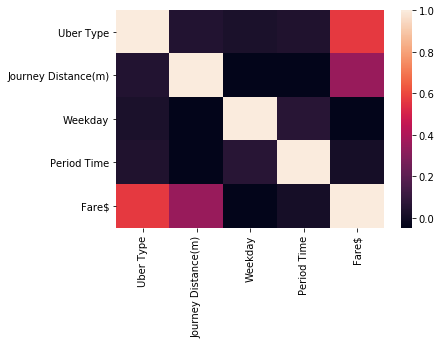

In [157]:
corr = uber.loc[:,['Uber Type','Journey Distance(m)','Weekday','Period Time','Fare$']].corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [158]:
print(uber.loc[:,['Uber Type','Journey Distance(m)','Weekday','Period Time','Fare$']].corr())

                     Uber Type  Journey Distance(m)   Weekday  Period Time  \
Uber Type             1.000000             0.049773  0.029038     0.040727   
Journey Distance(m)   0.049773             1.000000 -0.046782    -0.045418   
Weekday               0.029038            -0.046782  1.000000     0.064989   
Period Time           0.040727            -0.045418  0.064989     1.000000   
Fare$                 0.568991             0.351232 -0.045088     0.013854   

                        Fare$  
Uber Type            0.568991  
Journey Distance(m)  0.351232  
Weekday             -0.045088  
Period Time          0.013854  
Fare$                1.000000  


From the plot and result of correation, we can see perfect linear positive correlation between 'Journey Distance(m)' and 'Travel Time(s)' ( because of the perfect correlation we can use ly one feature in our mdel so I will use Journey Distabse(m) . But also we can positive correlation between  Fare and Uber Type, Fare and Journey Distance(m) Fare and Travel Time(s), Fare and  Period Time (low) and negative small correltin between Fare$ and Weekday.

In the next part I will create Linear regression where Fare$ will be the target and 'Journey Distance(m)','Travel Time(s)','Weekday','Period Time' wil be the Dependent features.

### -Uber Type 0

I will create model0 for Uber Type 0

[ 4.11943556e-04 -3.96141127e+00  3.01044501e+00]
r-squared for this model0 =  0.9683432123216404


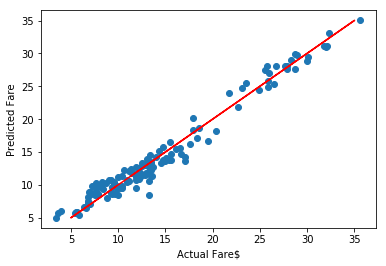

In [159]:
# Uber Type = 0
lm0 = LinearRegression()
x0= uber.loc[(uber['Uber Type'] ==0),['Journey Distance(m)','Weekday','Period Time']]
y0 = uber.loc[(uber['Uber Type'] ==0),'Fare$']

model0 = lm0.fit(x0,y0)
print( model0.coef_)
print ('r-squared for this model0 = ',model0.score(x0,y0))

y_pred0 = model0.predict(x0)


plt.scatter(y0,y_pred0)
plt.plot(y_pred0, y_pred0,color='red')
plt.xlabel('Actual Fare$') 
plt.ylabel('Predicted Fare')
plt.show()

### -Ubert Type 1

r-squared for this model2 =  0.9863451566142042
[ 9.59734629e-04 -3.32559712e+00  5.09998663e+00]


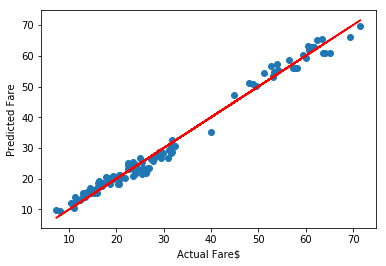

In [160]:
# Uber Type = 1
lm1 = LinearRegression()
x1= uber.loc[(uber['Uber Type'] ==1),['Journey Distance(m)','Weekday','Period Time']]
y1 = uber.loc[(uber['Uber Type'] ==1),'Fare$']
model1 = lm1.fit(x1,y1)
print ('r-squared for this model2 = ',model1.score(x1,y1))
print( model1.coef_)
y_pred1 = model1.predict(x1)


plt.scatter(y1,y_pred1)
plt.plot(y1, y1,color='red')
plt.xlabel('Actual Fare$') 
plt.ylabel('Predicted Fare')
plt.show()

### -Uber Type 2

r-squared for this model2 =  0.9912904461708215
[ 0.01858825 -6.41520439  9.63216615]


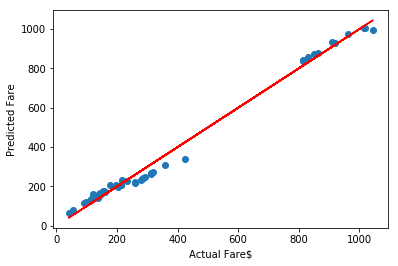

In [161]:
# Uber Type = 2
lm2 = LinearRegression()
x2= uber.loc[(uber['Uber Type'] ==2),['Journey Distance(m)','Weekday','Period Time']]
y2 = uber.loc[(uber['Uber Type'] ==2),'Fare$']
model2 = lm2.fit(x2,y2)
y_pred2 = model2.predict(x2)
print ('r-squared for this model2 = ',model2.score(x2,y2))
print( model2.coef_)


plt.scatter(y2,y_pred2)
plt.plot(y2, y2,color='red')
plt.xlabel('Actual Fare$') 
plt.ylabel('Predicted Fare')
plt.show()

In [162]:
print( model0.coef_)
print ('r-squared for this model0 = ',model0.score(x0,y0))
print( model1.coef_)
print ('r-squared for this model1 = ',model1.score(x1,y1))
print( model2.coef_)
print ('r-squared for this model2 = ',model2.score(x2,y2))

[ 4.11943556e-04 -3.96141127e+00  3.01044501e+00]
r-squared for this model0 =  0.9683432123216404
[ 9.59734629e-04 -3.32559712e+00  5.09998663e+00]
r-squared for this model1 =  0.9863451566142042
[ 0.01858825 -6.41520439  9.63216615]
r-squared for this model2 =  0.9912904461708215


From the models we can see that the Fare is in dependent variable and depends from Journey Distance(m), Weekday, Period Time the R^2 for the three Uber Type is around 1 s I will consider Fare as clean data.

Remove the columns that was created before and save the clean dataset.

In [163]:
del uber['u']
del uber['v']
del uber['Shortest Journey Distance(m)']
del uber['Shortest Travel Time(s)']

In [164]:
uberTrain = uber.copy()
uberTrainBkp = uber.copy()

In [165]:
del uber['Weekday']
del uber['Period Time']

In [166]:
uber.rename(columns={'Id':''}, inplace=True)
uber.head()

Uber Type  Origin Region  Destination Region  \
0  ID3268182362          1              2                   7   
1  ID5214522894          2              2                   7   
2  ID3255906293          1              2                   7   
3  ID3262306542          1              5                   3   
4  ID1236493597          0              6                   8   

   Origin Latitude  Origin Longitude  Destination Latitude  \
0       -37.819723        144.946810            -37.861835   
1       -37.823397        144.935580            -37.861835   
2       -37.822488        144.940021            -37.861835   
3       -37.799764        144.935714            -37.824681   
4       -37.787433        144.980377            -37.815834   

   Destination Longitude  Journey Distance(m) Departure Date Departure Time  \
0             144.905716               9151.0     2018-04-27       13:55:25   
1             144.905716               9980.0     2018-04-18       14:22:32   
2             144.905716               9542.0     2018-03-12       12:21:07   
3             145.005716               9658.0     2018-02-12       02:56:01   
4             145.046450               8361.0     2018-03-18       06:41:07   

   Travel Time(s) Arrival Time   Fare$  
0         3081.66     14:46:46   23.46  
1         3317.70     15:17:49  281.33  
2         3270.18     13:15:37   24.02  
3         2098.02      3:30:59   25.03  
4         2438.22      7:21:45   13.59

In [167]:
uber.to_csv('29193869_dirty_data_solution.csv',index=False)

# 2. Missing Values

In this part I am going to Impute the missing value for the uber missing values dataset. <br>
First I wlll read the dataset from the file ``29193869_missing_value.csv `` 

In [168]:
uberMissing = pd.read_csv("29193869_missing_value.csv")
uberMissing.head(5)

Unnamed: 0  Uber Type  Origin Region  Destination Region  \
0  ID3525275249        NaN              6                   7   
1  ID1585022773        0.0              1                   6   
2  ID1897046863        0.0              8                   9   
3  ID1604303973        NaN              7                   4   
4  ID3941614158        NaN              1                   7   

   Origin Latitude  Origin Longitude  Destination Latitude  \
0       -37.790818        144.985793            -37.861835   
1       -37.803323        144.965049            -37.787442   
2       -37.815834        145.046450            -38.110916   
3       -37.861835        144.905716            -37.806477   
4       -37.820261        144.969544            -37.861835   

   Destination Longitude  Journey Distance(m) Departure Date Departure Time  \
0             144.905716              11712.0     2018-06-08       15:53:37   
1             144.980409               2855.0     2018-03-20       17:35:30   
2             144.654173              51032.0     2018-01-19       10:20:51   
3             145.008075              12205.0     2018-03-26       05:27:21   
4             144.905716               7683.0     2018-04-18       06:18:21   

   Travel Time(s) Arrival Time  Fare$  
0         3717.48     16:55:34  25.53  
1          737.28     17:47:47   7.79  
2        12681.06     13:52:12  19.64  
3         3880.68      6:32:01  14.85  
4         2672.88      7:02:53  14.65

In [169]:
uberMissing.rename(columns={'Unnamed: 0':'Id'}, inplace=True)
print (uberMissing.shape) 
uberMissing.head(5)

(111, 14)


Id  Uber Type  Origin Region  Destination Region  \
0  ID3525275249        NaN              6                   7   
1  ID1585022773        0.0              1                   6   
2  ID1897046863        0.0              8                   9   
3  ID1604303973        NaN              7                   4   
4  ID3941614158        NaN              1                   7   

   Origin Latitude  Origin Longitude  Destination Latitude  \
0       -37.790818        144.985793            -37.861835   
1       -37.803323        144.965049            -37.787442   
2       -37.815834        145.046450            -38.110916   
3       -37.861835        144.905716            -37.806477   
4       -37.820261        144.969544            -37.861835   

   Destination Longitude  Journey Distance(m) Departure Date Departure Time  \
0             144.905716              11712.0     2018-06-08       15:53:37   
1             144.980409               2855.0     2018-03-20       17:35:30   
2             144.654173              51032.0     2018-01-19       10:20:51   
3             145.008075              12205.0     2018-03-26       05:27:21   
4             144.905716               7683.0     2018-04-18       06:18:21   

   Travel Time(s) Arrival Time  Fare$  
0         3717.48     16:55:34  25.53  
1          737.28     17:47:47   7.79  
2        12681.06     13:52:12  19.64  
3         3880.68      6:32:01  14.85  
4         2672.88      7:02:53  14.65

This dataset has 111 x 14 recrds of data . <br>

## Check missing values 

In this part I am going to check for missing values. <br>
First I will print infrmation for the dataset like total number of records, datatype..


In [170]:
uberMissing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 14 columns):
Id                       111 non-null object
Uber Type                91 non-null float64
Origin Region            111 non-null int64
Destination Region       111 non-null int64
Origin Latitude          111 non-null float64
Origin Longitude         111 non-null float64
Destination Latitude     111 non-null float64
Destination Longitude    111 non-null float64
Journey Distance(m)      111 non-null float64
Departure Date           111 non-null object
Departure Time           111 non-null object
Travel Time(s)           111 non-null float64
Arrival Time             111 non-null object
Fare$                    92 non-null float64
dtypes: float64(8), int64(2), object(4)
memory usage: 12.2+ KB


From the information we can see that "Uber Type" and "Fare"  have less the 111 entry. <br>
"Uber Type"  has 91 of 111 entry and "Fare$" has 92 of 111 entry.

### Descriptive statistics

In [171]:
uberMissing.describe()

Uber Type  Origin Region  Destination Region  Origin Latitude  \
count  91.000000     111.000000          111.000000       111.000000   
mean    0.637363       4.909910            4.819820       -37.842326   
std     0.738113       2.674967            2.501629         0.087705   
min     0.000000       1.000000            1.000000       -38.110916   
25%     0.000000       2.000000            3.000000       -37.823386   
50%     0.000000       5.000000            5.000000       -37.815834   
75%     1.000000       7.000000            7.000000       -37.806534   
max     2.000000       9.000000            9.000000       -37.773803   

       Origin Longitude  Destination Latitude  Destination Longitude  \
count        111.000000            111.000000             111.000000   
mean         144.941589            -37.841103             144.941449   
std            0.099560              0.087502               0.098559   
min          144.654173            -38.110916             144.654173   
25%          144.931171            -37.820865             144.932669   
50%          144.967216            -37.815834             144.968279   
75%          144.988634            -37.806606             144.991155   
max          145.046450            -37.773803             145.046450   

       Journey Distance(m)  Travel Time(s)        Fare$  
count           111.000000      111.000000    92.000000  
mean          14218.738739     3754.465405    78.880326  
std           15856.067293     3868.792443   225.785101  
min              64.000000       11.520000     5.700000  
25%            4495.000000     1188.210000    11.987500  
50%            7920.000000     2152.260000    19.125000  
75%           13169.000000     3904.110000    25.660000  
max           51032.000000    13204.980000  1171.080000

In [172]:
uberMissing.describe(include=['O']) 

Id Departure Date Departure Time Arrival Time
count            111            111            111          111
unique           111             84            111          111
top     ID1348083464     2018-07-01       01:38:57     12:20:50
freq               1              3              1            1

In [173]:
uberMissing[(~uberMissing['Uber Type'].isnull())&(~uberMissing['Fare$'].isnull())].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72 entries, 1 to 110
Data columns (total 14 columns):
Id                       72 non-null object
Uber Type                72 non-null float64
Origin Region            72 non-null int64
Destination Region       72 non-null int64
Origin Latitude          72 non-null float64
Origin Longitude         72 non-null float64
Destination Latitude     72 non-null float64
Destination Longitude    72 non-null float64
Journey Distance(m)      72 non-null float64
Departure Date           72 non-null object
Departure Time           72 non-null object
Travel Time(s)           72 non-null float64
Arrival Time             72 non-null object
Fare$                    72 non-null float64
dtypes: float64(8), int64(2), object(4)
memory usage: 8.4+ KB


Save dataframe without the missing values for Fare$ and Uber Type into UberMissingTrain. This dataframe I am going to use later.

In [174]:
uberMissingTrain = uberMissing[(~uberMissing['Uber Type'].isnull())&(~uberMissing['Fare$'].isnull())].copy()

In [175]:
uberMissingTrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72 entries, 1 to 110
Data columns (total 14 columns):
Id                       72 non-null object
Uber Type                72 non-null float64
Origin Region            72 non-null int64
Destination Region       72 non-null int64
Origin Latitude          72 non-null float64
Origin Longitude         72 non-null float64
Destination Latitude     72 non-null float64
Destination Longitude    72 non-null float64
Journey Distance(m)      72 non-null float64
Departure Date           72 non-null object
Departure Time           72 non-null object
Travel Time(s)           72 non-null float64
Arrival Time             72 non-null object
Fare$                    72 non-null float64
dtypes: float64(8), int64(2), object(4)
memory usage: 8.4+ KB


### Sum of missing values for each column

uberMissing.isnull().sum()

## Investigate with missing values for Uber Type

After investigating the dataset in the datacleaning task I found  that there is a reltinship between uberId(Unnamed: 0 column) and Uber Type <br>
```
Id starts   Uber Type
------------------------
ID1...     Uber Type 0
ID3...     Uber Type 1
ID5...     Uber Type 2
```

First lets check number of records for each Uber Type.

In [176]:
uberMissing['Uber Type'].value_counts()

0.0    47
1.0    30
2.0    14
Name: Uber Type, dtype: int64

I will check first 5 rows of id fr each Uber Type.

In [177]:
uberMissing['Id'][uberMissing['Uber Type']==0].head()

1     ID1585022773
2     ID1897046863
6     ID1332970382
10    ID1775267669
13    ID1817989988
Name: Id, dtype: object

In [178]:
uberMissing['Id'][uberMissing['Uber Type']==1].head()

8     ID3828149191
11    ID3643226312
12    ID3460129137
20    ID3995457070
26    ID3263919595
Name: Id, dtype: object

In [179]:
uberMissing['Id'][uberMissing['Uber Type']==2].head()

37    ID5896654924
46    ID5826959195
48    ID5213274104
53    ID5854130162
54    ID5499348222
Name: Id, dtype: object

Lets print first 5 rows where Uber Type is NULL.

In [180]:
uberMissing[uberMissing['Uber Type'].isnull()].head() 

Id  Uber Type  Origin Region  Destination Region  \
0  ID3525275249        NaN              6                   7   
3  ID1604303973        NaN              7                   4   
4  ID3941614158        NaN              1                   7   
5  ID1628143090        NaN              9                   7   
7  ID5711000850        NaN              1                   3   

   Origin Latitude  Origin Longitude  Destination Latitude  \
0       -37.790818        144.985793            -37.861835   
3       -37.861835        144.905716            -37.806477   
4       -37.820261        144.969544            -37.861835   
5       -38.110916        144.654173            -37.861835   
7       -37.815204        144.936492            -37.819073   

   Destination Longitude  Journey Distance(m) Departure Date Departure Time  \
0             144.905716              11712.0     2018-06-08       15:53:37   
3             145.008075              12205.0     2018-03-26       05:27:21   
4             144.905716               7683.0     2018-04-18       06:18:21   
5             144.905716              50797.0     2018-07-01       21:00:42   
7             144.982192               4734.0     2018-04-06       14:59:50   

   Travel Time(s) Arrival Time   Fare$  
0         3717.48     16:55:34   25.53  
3         3880.68      6:32:01   14.85  
4         2672.88      7:02:53   14.65  
5        13204.98      0:40:46   30.70  
7         1134.96     15:18:44  124.82

In [181]:
uberMissing[uberMissing['Uber Type'].isnull()]['Id']

0     ID3525275249
3     ID1604303973
4     ID3941614158
5     ID1628143090
7     ID5711000850
9     ID1239656707
14    ID1817184640
15    ID1755745954
16    ID3383706085
23    ID3718308007
25    ID5569725308
29    ID1258256806
31    ID3458770436
32    ID5443005435
34    ID5875884534
35    ID1849103956
38    ID1317559578
39    ID3795872339
40    ID1728175204
44    ID1137793073
Name: Id, dtype: object

Because we know the relationship between Uber Id and Uber Type we can impute Uber Type.
```
Id starts   Uber Type
------------------------
ID1...     Uber Type 0

```


In [182]:
uberMissing[(uberMissing['Uber Type'].isnull())&(uberMissing['Id'].astype(str).str[2]=='1')]

Id  Uber Type  Origin Region  Destination Region  \
3   ID1604303973        NaN              7                   4   
5   ID1628143090        NaN              9                   7   
9   ID1239656707        NaN              7                   6   
14  ID1817184640        NaN              1                   9   
15  ID1755745954        NaN              1                   4   
29  ID1258256806        NaN              1                   2   
35  ID1849103956        NaN              5                   3   
38  ID1317559578        NaN              7                   5   
40  ID1728175204        NaN              2                   3   
44  ID1137793073        NaN              8                   5   

    Origin Latitude  Origin Longitude  Destination Latitude  \
3        -37.861835        144.905716            -37.806477   
5        -38.110916        144.654173            -37.861835   
9        -37.861835        144.905716            -37.773845   
14       -37.803193        144.951246            -38.110916   
15       -37.816814        144.970112            -37.810240   
29       -37.809525        144.933960            -37.819381   
35       -37.803995        144.936298            -37.819752   
38       -37.861835        144.905716            -37.805175   
40       -37.823078        144.937863            -37.817134   
44       -37.807202        145.026637            -37.805173   

    Destination Longitude  Journey Distance(m) Departure Date Departure Time  \
3              145.008075              12205.0     2018-03-26       05:27:21   
5              144.905716              50797.0     2018-07-01       21:00:42   
9              144.983689              13169.0     2018-01-04       01:38:54   
14             144.654173              43594.0     2018-06-17       18:21:42   
15             145.010334               4278.0     2018-02-02       19:49:24   
29             144.941667               1897.0     2018-05-19       08:32:15   
35             144.969768               4132.0     2018-01-22       02:13:04   
38             144.932834              10975.0     2018-07-16       12:01:42   
40             144.988808               4909.0     2018-02-14       13:29:21   
44             144.928272               9453.0     2018-01-20       09:15:21   

    Travel Time(s) Arrival Time  Fare$  
3          3880.68      6:32:01  14.85  
5         13204.98      0:40:46  30.70  
9          3863.58      2:43:17  16.05  
14        10478.04     21:16:20  26.63  
15         1085.64     20:07:29   9.62  
29          442.80      8:39:37   8.37  
35         1071.84      2:30:55  15.16  
38         3542.04     13:00:44   9.94  
40         1252.32     13:50:13   8.57  
44         2409.00      9:55:30  11.65

- Impute Uber Type 0 for data which value is null in Uber Type column and id of uber starts with 1

In [183]:
uberMissing.loc[(uberMissing['Uber Type'].isnull())&(uberMissing['Id'].astype(str).str[2]=='1'),'Uber Type'] = 0

```
Id starts   Uber Type
------------------------
ID3...     Uber Type 1
```

In [184]:
uberMissing[(uberMissing['Uber Type'].isnull())&(uberMissing['Id'].astype(str).str[2]=='3')]

Id  Uber Type  Origin Region  Destination Region  \
0   ID3525275249        NaN              6                   7   
4   ID3941614158        NaN              1                   7   
16  ID3383706085        NaN              6                   9   
23  ID3718308007        NaN              3                   7   
31  ID3458770436        NaN              8                   4   
39  ID3795872339        NaN              8                   6   

    Origin Latitude  Origin Longitude  Destination Latitude  \
0        -37.790818        144.985793            -37.861835   
4        -37.820261        144.969544            -37.861835   
16       -37.773845        144.983689            -38.110916   
23       -37.808920        144.982550            -37.861835   
31       -37.807202        145.026637            -37.802487   
39       -37.815834        145.046450            -37.790818   

    Destination Longitude  Journey Distance(m) Departure Date Departure Time  \
0              144.905716              11712.0     2018-06-08       15:53:37   
4              144.905716               7683.0     2018-04-18       06:18:21   
16             144.654173              48197.0     2018-02-16       01:48:47   
23             144.905716               9696.0     2018-04-12       22:07:56   
31             145.005142               2709.0     2018-04-24       13:43:41   
39             144.985793               7471.0     2018-05-15       00:35:21   

    Travel Time(s) Arrival Time  Fare$  
0          3717.48     16:55:34  25.53  
4          2672.88      7:02:53  14.65  
16        11519.40      5:00:46  63.39  
23         3240.24     23:01:56  26.85  
31          721.80     13:55:42  10.44  
39         2192.70      1:11:53  20.42

- Impute Uber Type 1 for data which value is null in Uber Type column and id of uber starts with 3

In [185]:
uberMissing.loc[(uberMissing['Uber Type'].isnull())&(uberMissing['Id'].astype(str).str[2]=='3'),'Uber Type'] = 1

```
Id starts   Uber Type
------------------------
ID5...     Uber Type 2
```

In [186]:
uberMissing[(uberMissing['Uber Type'].isnull())&(uberMissing['Id'].astype(str).str[2]=='5')]

Id  Uber Type  Origin Region  Destination Region  \
7   ID5711000850        NaN              1                   3   
25  ID5569725308        NaN              2                   1   
32  ID5443005435        NaN              5                   4   
34  ID5875884534        NaN              4                   9   

    Origin Latitude  Origin Longitude  Destination Latitude  \
7        -37.815204        144.936492            -37.819073   
25       -37.819246        144.942449            -37.818102   
32       -37.818743        144.916626            -37.810851   
34       -37.803553        144.998798            -38.110916   

    Destination Longitude  Journey Distance(m) Departure Date Departure Time  \
7              144.982192               4734.0     2018-04-06       14:59:50   
25             144.948573                681.0     2018-03-14       21:30:07   
32             144.998231               7745.0     2018-04-27       22:47:34   
34             144.654173              47618.0     2018-04-12       13:23:48   

    Travel Time(s) Arrival Time    Fare$  
7          1134.96     15:18:44   124.82  
25          168.66     21:32:55    48.44  
32         2028.72     23:21:22   214.72  
34        11551.98     16:36:19  1059.44

- Impute Uber Type 2 for data which value is null in Uber Type column and id of uber starts with 5

In [187]:
uberMissing.loc[(uberMissing['Uber Type'].isnull())&(uberMissing['Id'].astype(str).str[2]=='5'),'Uber Type'] = 2

 - After Imputatin lets check again Uber Type.

In [188]:
sum(uberMissing['Uber Type'].value_counts())

111

I have assigned all Uber Type, no more Null values for Uber Type. <br>
- I will save in uberMissingTrain, uberMissing dataset without null rows for Fare$ and also wll include the Imputed values for Uber Type 

In [189]:
uberMissingTrain = uberMissing[(~uberMissing['Fare$'].isnull())].copy()

## Investigate with missing values for Fare$

First find The Departure Period Using the method ``PeridTime()`` defined above.

In [190]:
PeriodTime(uberMissing)
PeriodTime(uberMissingTrain)

In [191]:
uberMissingTrain.head()

Id  Uber Type  Origin Region  Destination Region  \
0  ID3525275249        1.0              6                   7   
1  ID1585022773        0.0              1                   6   
2  ID1897046863        0.0              8                   9   
3  ID1604303973        0.0              7                   4   
4  ID3941614158        1.0              1                   7   

   Origin Latitude  Origin Longitude  Destination Latitude  \
0       -37.790818        144.985793            -37.861835   
1       -37.803323        144.965049            -37.787442   
2       -37.815834        145.046450            -38.110916   
3       -37.861835        144.905716            -37.806477   
4       -37.820261        144.969544            -37.861835   

   Destination Longitude  Journey Distance(m) Departure Date Departure Time  \
0             144.905716              11712.0     2018-06-08       15:53:37   
1             144.980409               2855.0     2018-03-20       17:35:30   
2             144.654173              51032.0     2018-01-19       10:20:51   
3             145.008075              12205.0     2018-03-26       05:27:21   
4             144.905716               7683.0     2018-04-18       06:18:21   

   Travel Time(s) Arrival Time  Fare$  Period Time  
0         3717.48     16:55:34  25.53          1.0  
1          737.28     17:47:47   7.79          1.0  
2        12681.06     13:52:12  19.64          0.0  
3         3880.68      6:32:01  14.85          2.0  
4         2672.88      7:02:53  14.65          0.0

In [192]:
uberMissing['Period Time'].value_counts()

1.0    44
2.0    40
0.0    27
Name: Period Time, dtype: int64

Next, define Departure Date Weekday usng the method ```WeekDay()``` defined above

In [193]:
WeekDay(uberMissing)
WeekDay(uberMissingTrain)

In [194]:
uberMissing['Weekday'].value_counts()

1.0    80
0.0    31
Name: Weekday, dtype: int64

In [195]:
uberMissing[uberMissing['Fare$'].isnull()]['Uber Type'].value_counts()

0.0    9
2.0    6
1.0    4
Name: Uber Type, dtype: int64

I will create dataframe uberMissingImpute wth all null fr Fare$

In [196]:
uberMissingImpute = uberMissing.dropna(axis = 0, how ='any') 
print("Old data frame length:", len(uberMissing), "\nNew data frame length:",  
       len(uberMissingImpute), "\nNumber of rows with at least 1 NA value: ", 
       (len(uberMissing)-len(uberMissingImpute)))

Old data frame length: 111 
New data frame length: 92 
Number of rows with at least 1 NA value:  19


In [197]:
uberMissingImpute['Uber Type'].value_counts()

0.0    48
1.0    32
2.0    12
Name: Uber Type, dtype: int64

I will merge both dataset the clean uber dataset and uberMissing dataset withut the missing values rows
``
uberTrain
uberMissingTrain
``

In [198]:
columnNames =list(uberMissingTrain.columns.values)
print(columnNames)

['Id', 'Uber Type', 'Origin Region', 'Destination Region', 'Origin Latitude', 'Origin Longitude', 'Destination Latitude', 'Destination Longitude', 'Journey Distance(m)', 'Departure Date', 'Departure Time', 'Travel Time(s)', 'Arrival Time', 'Fare$', 'Period Time', 'Weekday']


In [199]:
uTrain = pd.DataFrame()
uTrain = pd.concat([uberTrain,uberMissingTrain ])[columnNames]
train = uTrain.copy()


In [200]:
uTrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401 entries, 0 to 110
Data columns (total 16 columns):
Id                       401 non-null object
Uber Type                401 non-null float64
Origin Region            401 non-null int64
Destination Region       401 non-null int64
Origin Latitude          401 non-null float64
Origin Longitude         401 non-null float64
Destination Latitude     401 non-null float64
Destination Longitude    401 non-null float64
Journey Distance(m)      401 non-null float64
Departure Date           401 non-null object
Departure Time           401 non-null object
Travel Time(s)           401 non-null float64
Arrival Time             401 non-null object
Fare$                    401 non-null float64
Period Time              401 non-null float64
Weekday                  401 non-null float64
dtypes: float64(10), int64(2), object(4)
memory usage: 53.3+ KB


In [201]:
uTrain['Uber Type'].value_counts()

0.0    187
1.0    152
2.0     62
Name: Uber Type, dtype: int64

In [202]:
print(any(uTrain['Id'].duplicated()))
uTrain.info()

False
<class 'pandas.core.frame.DataFrame'>
Int64Index: 401 entries, 0 to 110
Data columns (total 16 columns):
Id                       401 non-null object
Uber Type                401 non-null float64
Origin Region            401 non-null int64
Destination Region       401 non-null int64
Origin Latitude          401 non-null float64
Origin Longitude         401 non-null float64
Destination Latitude     401 non-null float64
Destination Longitude    401 non-null float64
Journey Distance(m)      401 non-null float64
Departure Date           401 non-null object
Departure Time           401 non-null object
Travel Time(s)           401 non-null float64
Arrival Time             401 non-null object
Fare$                    401 non-null float64
Period Time              401 non-null float64
Weekday                  401 non-null float64
dtypes: float64(10), int64(2), object(4)
memory usage: 53.3+ KB


Our Train dataset contain 401 rows, I am going to use this dataset for creating the model for to Impute the Null values for Fare and also later for detecting the Outliers.

I am defining ``model`` method  this method is creating Linear Regression model where Fare$ is the target and Journey Distance(m), Weekday, Period Time are independent variables.

In [203]:
def model(uberType, uTrain):
    """
    :param uberType: (int) 0,1,2
    :param uTrain: (uber Data Frame) 
    :return: linear regressin model
    """
    lmM = LinearRegression() 
    x = uTrain.loc[(uTrain['Uber Type'] == uberType),['Journey Distance(m)','Weekday','Period Time']]
    y = uTrain.loc[(uTrain['Uber Type'] == uberType),'Fare$']
    
    model = lmM.fit(x,y)
    
    return model

I am defining ``imputeFare`` method  this method is imputing the Fare based on the model (Liear Regression) from the train dataset.

In [204]:
def imputeFare(uberType, df, dfMissing):
    """
    :param uberType: (int) 0,1,2
    :param df: (uber Data Frame) 
    :param df: (uber Data Frame)
    
    """
    m = model(uberType, df)
    
    x_test = dfMissing.loc[(dfMissing['Fare$'].isnull())&(dfMissing['Uber Type'] == uberType),['Journey Distance(m)','Weekday','Period Time']]
    yImpute = dfMissing.loc[(dfMissing['Fare$'].isnull())&(dfMissing['Uber Type'] == uberType),['Fare$']]
    
    y_pred = m.predict(x_test)
    count = 0
    for index, row in yImpute.iterrows():
        dfMissing.loc[dfMissing.index==index,'Fare$'] = round(y_pred[count],2)  
        count+=1
        

In [205]:
#Impute Fare for Uber Type 0
imputeFare(0, uTrain, uberMissing)
uberMissing[uberMissing['Fare$'].isnull()]['Uber Type'].value_counts()

2.0    6
1.0    4
Name: Uber Type, dtype: int64

In [206]:
#Impute Fare for Uber Type 1
imputeFare(1, uTrain, uberMissing)
uberMissing[uberMissing['Fare$'].isnull()]['Uber Type'].value_counts()

2.0    6
Name: Uber Type, dtype: int64

In [207]:
#Impute Fare for Uber Type 2
imputeFare(2, uTrain, uberMissing)
uberMissing[uberMissing['Fare$'].isnull()]['Uber Type'].value_counts()

Series([], Name: Uber Type, dtype: int64)

In [208]:
uberMissing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 16 columns):
Id                       111 non-null object
Uber Type                111 non-null float64
Origin Region            111 non-null int64
Destination Region       111 non-null int64
Origin Latitude          111 non-null float64
Origin Longitude         111 non-null float64
Destination Latitude     111 non-null float64
Destination Longitude    111 non-null float64
Journey Distance(m)      111 non-null float64
Departure Date           111 non-null object
Departure Time           111 non-null object
Travel Time(s)           111 non-null float64
Arrival Time             111 non-null object
Fare$                    111 non-null float64
Period Time              111 non-null float64
Weekday                  111 non-null float64
dtypes: float64(10), int64(2), object(4)
memory usage: 14.0+ KB


From the nf we can see that now we do not have null values in the dataset. <br>
Next I am going to save the Imputed dataset into file.

Before I save the dataset into file I am going to return the dataset format as it was on the begining.

In [209]:
uberMissing.rename(columns={'Id':''}, inplace=True)
del uberMissing['Period Time']
del uberMissing['Weekday']

In [210]:
uberMissing.head()

Uber Type  Origin Region  Destination Region  \
0  ID3525275249        1.0              6                   7   
1  ID1585022773        0.0              1                   6   
2  ID1897046863        0.0              8                   9   
3  ID1604303973        0.0              7                   4   
4  ID3941614158        1.0              1                   7   

   Origin Latitude  Origin Longitude  Destination Latitude  \
0       -37.790818        144.985793            -37.861835   
1       -37.803323        144.965049            -37.787442   
2       -37.815834        145.046450            -38.110916   
3       -37.861835        144.905716            -37.806477   
4       -37.820261        144.969544            -37.861835   

   Destination Longitude  Journey Distance(m) Departure Date Departure Time  \
0             144.905716              11712.0     2018-06-08       15:53:37   
1             144.980409               2855.0     2018-03-20       17:35:30   
2             144.654173              51032.0     2018-01-19       10:20:51   
3             145.008075              12205.0     2018-03-26       05:27:21   
4             144.905716               7683.0     2018-04-18       06:18:21   

   Travel Time(s) Arrival Time  Fare$  
0         3717.48     16:55:34  25.53  
1          737.28     17:47:47   7.79  
2        12681.06     13:52:12  19.64  
3         3880.68      6:32:01  14.85  
4         2672.88      7:02:53  14.65

In [211]:
uberMissing.to_csv('29193869_missing_value_solution.csv',index=False)

# 3. Outliers

An outlier is a data point in a data set that is distant from all other observations. A data point that lies outside the overall distribution of the dataset.

-Data point that falls outside of 1.5 times of an interquartile range above the 3rd quartile and below the 1st quartile <br>
-Data point that falls outside of 3 standard deviations. 

In [212]:
uberOutliers = pd.read_csv("29193869_outliers.csv")
uberOutliers.head()

Unnamed: 0  Unnamed: 0.1  Uber Type  Origin Region  Destination Region  \
0           0  ID1430743049          0              7                   6   
1           1  ID3593274760          1              5                   1   
2           2  ID3940827701          1              8                   9   
3           3  ID1638574679          0              4                   5   
4           4  ID3144201459          1              2                   7   

   Origin Latitude  Origin Longitude  Destination Latitude  \
0       -37.861835        144.905716            -37.787433   
1       -37.813202        144.933495            -37.799968   
2       -37.807202        145.026637            -38.110916   
3       -37.804716        144.999819            -37.814295   
4       -37.821504        144.945637            -37.861835   

   Destination Longitude  Journey Distance(m) Departure Date Departure Time  \
0             144.980377              11633.0     2018-04-27       00:39:00   
1             144.971460               5239.0     2018-04-08       08:40:28   
2             144.654173              49777.0     2018-07-06       06:52:56   
3             144.932816               7664.0     2018-03-03       11:29:14   
4             144.905716               9105.0     2018-05-17       03:49:26   

   Travel Time(s) Arrival Time   Fare$  
0         3645.30      1:39:45  16.140  
1         1326.90      9:02:34   6.695  
2        12069.78     10:14:05  47.960  
3         1973.82     12:02:07   9.130  
4         3180.66      4:42:26  13.160

I will rename Unnamed: 0.1 into Id for easter manipulation.

In [213]:
uberOutliers.rename(columns={'Unnamed: 0.1':'Id'}, inplace=True)
WeekDay(uberOutliers)
PeriodTime(uberOutliers)

In [214]:
uberOutliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 17 columns):
Unnamed: 0               84 non-null int64
Id                       84 non-null object
Uber Type                84 non-null int64
Origin Region            84 non-null int64
Destination Region       84 non-null int64
Origin Latitude          84 non-null float64
Origin Longitude         84 non-null float64
Destination Latitude     84 non-null float64
Destination Longitude    84 non-null float64
Journey Distance(m)      84 non-null float64
Departure Date           84 non-null object
Departure Time           84 non-null object
Travel Time(s)           84 non-null float64
Arrival Time             84 non-null object
Fare$                    84 non-null float64
Weekday                  84 non-null float64
Period Time              84 non-null float64
dtypes: float64(9), int64(4), object(4)
memory usage: 11.2+ KB


We can see that the uber Outliers dataset contain 84 entries.

In [215]:
columnNames =list(uTrain.columns.values)
print(columnNames)

['Id', 'Uber Type', 'Origin Region', 'Destination Region', 'Origin Latitude', 'Origin Longitude', 'Destination Latitude', 'Destination Longitude', 'Journey Distance(m)', 'Departure Date', 'Departure Time', 'Travel Time(s)', 'Arrival Time', 'Fare$', 'Period Time', 'Weekday']


Here I will concatenate the clean dataset + missing value dataset (without missing values rows) with outliers dataset. Because the outliers dataset contains Outliers I will try to identify the outliers with botbox from the concatanated dataset.

In [216]:
uAll = pd.DataFrame()
uAll = pd.concat([uTrain,uberOutliers ])[columnNames]

In [217]:
uAll.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 485 entries, 0 to 83
Data columns (total 16 columns):
Id                       485 non-null object
Uber Type                485 non-null float64
Origin Region            485 non-null int64
Destination Region       485 non-null int64
Origin Latitude          485 non-null float64
Origin Longitude         485 non-null float64
Destination Latitude     485 non-null float64
Destination Longitude    485 non-null float64
Journey Distance(m)      485 non-null float64
Departure Date           485 non-null object
Departure Time           485 non-null object
Travel Time(s)           485 non-null float64
Arrival Time             485 non-null object
Fare$                    485 non-null float64
Period Time              485 non-null float64
Weekday                  485 non-null float64
dtypes: float64(10), int64(2), object(4)
memory usage: 64.4+ KB


I am going to use same dataframe uTrain as a train dataset to find the Outliers.

## Using boxpot to investigate outliers

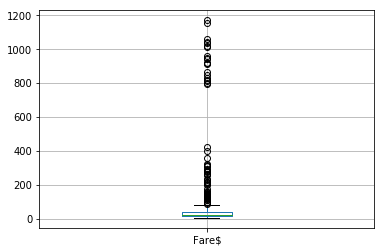

In [218]:
bp = uAll.boxplot(column='Fare$')

It seems that there are many extreme values for "Fare$". But the calculation of Fare is done by Uber Type so I will plot based on Uber Type.

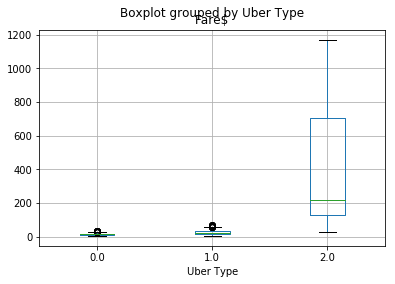

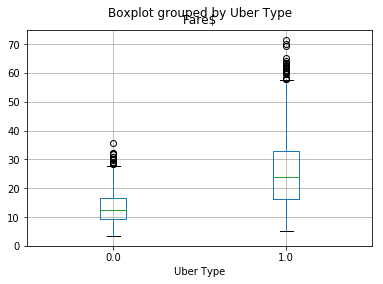

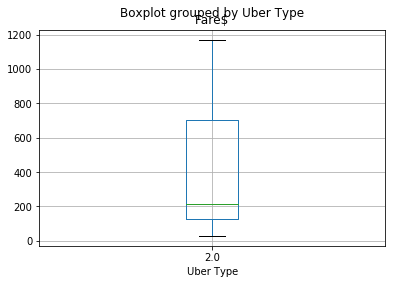

In [219]:
bp = uAll.boxplot(column='Fare$', by = 'Uber Type')
bp = uAll.loc[(uAll['Uber Type']!=2)].boxplot(column='Fare$', by = 'Uber Type')
bp = uAll.loc[(uAll['Uber Type']==2)].boxplot(column='Fare$', by = 'Uber Type')

After plotting boxplot grouped by Uber Type, we can already notice outliers for Uber Type 0 and Uber Type 1, and no outliers catches for Uber Type 2. <br>
- I will try to identify Outliers group by Uber Type and Filter by Week Day and Period Time

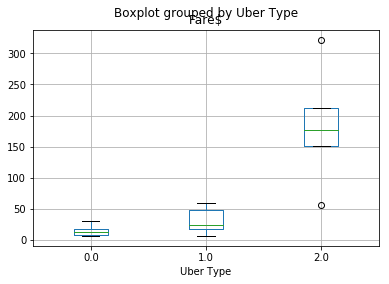

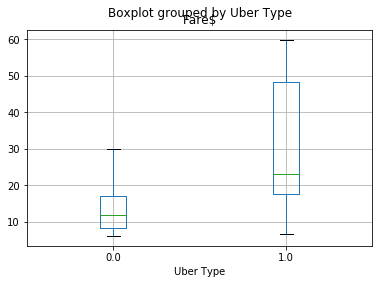

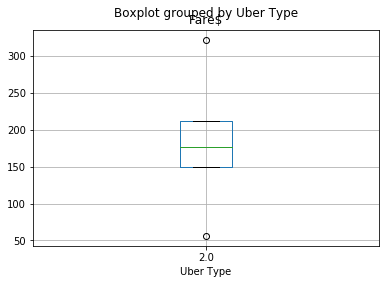

In [220]:
bp = uAll.loc[(uAll['Weekday']==0)& (uAll['Period Time']==0)].boxplot(column='Fare$', by = 'Uber Type')
bp = uAll.loc[(uAll['Uber Type']!=2)&(uAll['Weekday']==0)& (uAll['Period Time']==0)].boxplot(column='Fare$', by = 'Uber Type')
bp = uAll.loc[(uAll['Uber Type']==2)&(uAll['Weekday']==0)& (uAll['Period Time']==0)].boxplot(column='Fare$', by = 'Uber Type')

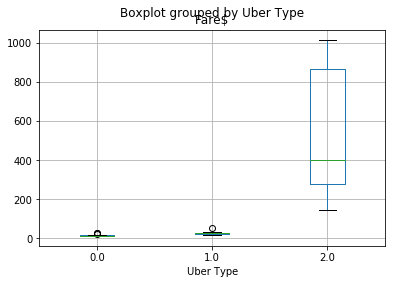

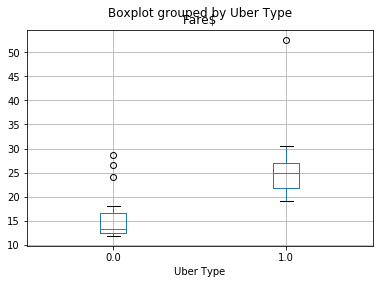

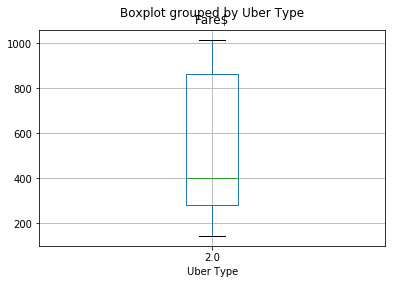

In [221]:
bp = uAll.loc[(uAll['Weekday']==0)& (uAll['Period Time']==1)].boxplot(column='Fare$', by = 'Uber Type')
bp = uAll.loc[(uAll['Uber Type']!=2)&(uAll['Weekday']==0)& (uAll['Period Time']==1)].boxplot(column='Fare$', by = 'Uber Type')
bp = uAll.loc[(uAll['Uber Type']==2)&(uAll['Weekday']==0)& (uAll['Period Time']==1)].boxplot(column='Fare$', by = 'Uber Type')

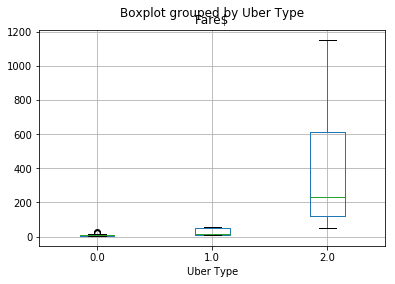

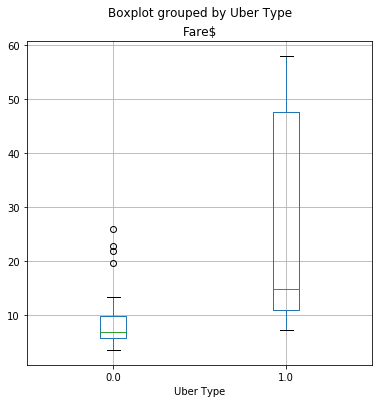

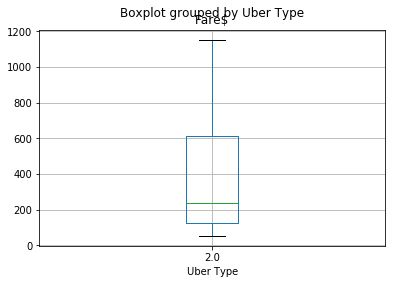

In [222]:
bp = uAll.loc[(uAll['Weekday']==1)& (uAll['Period Time']==0)].boxplot(column='Fare$', by = 'Uber Type')
bp = uAll.loc[(uAll['Uber Type']!=2)&(uAll['Weekday']==1)& (uAll['Period Time']==0)].boxplot(column='Fare$', by = 'Uber Type',figsize=(6,6))
bp = uAll.loc[(uAll['Uber Type']==2)&(uAll['Weekday']==1)& (uAll['Period Time']==0)].boxplot(column='Fare$', by = 'Uber Type')

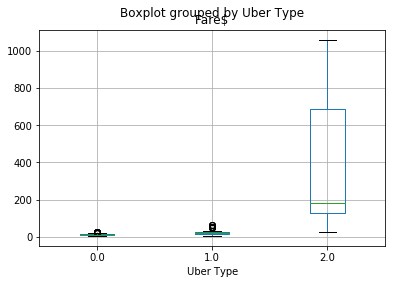

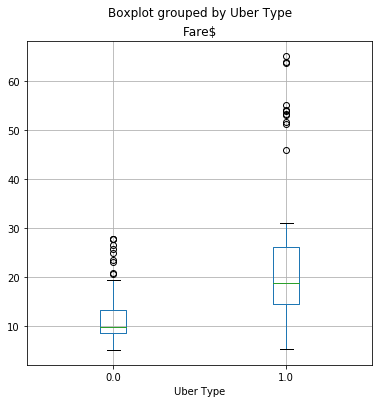

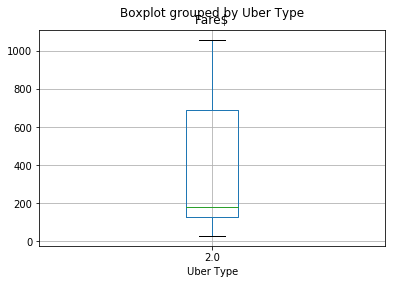

In [223]:
bp = uAll.loc[(uAll['Weekday']==1)& (uAll['Period Time']==1)].boxplot(column='Fare$', by = 'Uber Type')
bp = uAll.loc[(uAll['Uber Type']!=2)&(uAll['Weekday']==1)& (uAll['Period Time']==1)].boxplot(column='Fare$', by = 'Uber Type',figsize=(6,6))
bp = uAll.loc[(uAll['Uber Type']==2)&(uAll['Weekday']==1)& (uAll['Period Time']==1)].boxplot(column='Fare$', by = 'Uber Type')

After ploting sepratly and filtering we can notice outiers for Uber Type 2.

Next I am going to Try to detect outliers using IQR (The interquartile range). <br>
IQR = Q3 − Q1 (the first quartile subtracted from the third quartile) <br>
The data points less then Q1 - (IQR * 1.5) or greater then Q3 + (IQR * 1.5) are considered as outliers.
<br> <br>
- I am creating ``iqrBorder`` method which will calculate lower and upper border for detecting outliers.

In [224]:
def iqrBorder(df):
    """
    :param df: (uber['Fare$'] Data Frame) 
    :return: list(lwer, upper)
    """
    Q1 = df.sort_values().quantile(0.25)
    Q3 = df.sort_values().quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - (IQR * 1.5)
    upper = Q3 + (IQR * 1.5)
    
    return [lower, upper]

- I am creating ``residual`` method which will calculate the residual Actuar Fare minus Predcted Fare$ (from the model) and this methd will save the residual int Residual column in the data frame.

In [225]:
def residual(uberType, df):
    """
    :param uberType:0,1 or 2
    :param df: (uber Data Frame) 
    
    """
    mm = model(uberType, df)
    
    x = df.loc[(df['Uber Type'] == uberType),['Journey Distance(m)','Weekday','Period Time']]
    y = df.loc[(df['Uber Type'] == uberType),['Fare$']]
    y_pred = mm.predict(x)
    
    count = 0
    for index, row in y.iterrows():
        r = round(row["Fare$"] - y_pred[count],4)
        df.loc[df.index==index, 'Residual'] = r
        count+=1

- I am creating ``removeOutliers`` method which will remove the outliers. This method is checking if the residual of Outlier dataset are less then the lower border or greather then upper border ( the borders are calculated based on the train dataset ) . The method return a list with the ids of the Outlers.

In [226]:
def removeOutliers(df, dfResdual):
    """
    :param df: (uber Data Frame) 
    :param dfResdual: (uber Data Frame) 
    :return list
    """
    iqr0 = iqrBorder(dfResdual.loc[dfResdual['Uber Type'] == 0,'Residual'])
    iqr1 = iqrBorder(dfResdual.loc[dfResdual['Uber Type'] == 1,'Residual'])
    iqr2 = iqrBorder(dfResdual.loc[dfResdual['Uber Type'] == 2,'Residual'])

    count0 = 0
    count1 = 0
    count2 = 0
    indexOut = []
    for index, row in df.iterrows():
        type = row['Uber Type']
    
        if (type == 0 and (row['Residual']< iqr0[0] or row['Residual'] > iqr0[1])):
            indexOut.append(index)
            count0 +=1
             
        if (type == 1 and (row['Residual']< iqr1[0] or row['Residual'] > iqr1[1])):
            indexOut.append(index)
            count1 +=1
        
        if (type == 2 and (row['Residual']< iqr2[0] or row['Residual'] > iqr2[1])):
            indexOut.append(index)
            count2 +=1

    return indexOut

In [227]:
uResidual = uTrain.copy()
uOut = uberOutliers.copy()

#calculate residual of the train dataset
residual(0,train)
residual(1,train)
residual(2,train)

#calculate residual of the outlier dataset
residual(0,uOut)
residual(1,uOut)
residual(2,uOut)

indexOut = removeOutliers(uOut,train)

After we have the indexes of all the rows that are detected as Outliers, I am going to create dataset that does not contain that rows.

In [228]:
print("Detected Outliers: "+str(len(indexOut)))

Detected Outliers: 12


In [229]:
uberNoOutliers=uberOutliers[~uberOutliers.index.isin(indexOut)].copy()
uberNoOutliers.shape

(72, 17)

Our new Final dataset contain 72 rows.

In [230]:
uberNoOutliers.head()

Unnamed: 0            Id  Uber Type  Origin Region  Destination Region  \
0           0  ID1430743049          0              7                   6   
1           1  ID3593274760          1              5                   1   
2           2  ID3940827701          1              8                   9   
3           3  ID1638574679          0              4                   5   
7           7  ID3443623328          1              6                   4   

   Origin Latitude  Origin Longitude  Destination Latitude  \
0       -37.861835        144.905716            -37.787433   
1       -37.813202        144.933495            -37.799968   
2       -37.807202        145.026637            -38.110916   
3       -37.804716        144.999819            -37.814295   
7       -37.787442        144.980409            -37.810645   

   Destination Longitude  Journey Distance(m) Departure Date Departure Time  \
0             144.980377              11633.0     2018-04-27       00:39:00   
1             144.971460               5239.0     2018-04-08       08:40:28   
2             144.654173              49777.0     2018-07-06       06:52:56   
3             144.932816               7664.0     2018-03-03       11:29:14   
7             145.010657               5402.0     2018-02-06       12:33:50   

   Travel Time(s) Arrival Time   Fare$  Weekday  Period Time  
0         3645.30      1:39:45  16.140      1.0          2.0  
1         1326.90      9:02:34   6.695      0.0          0.0  
2        12069.78     10:14:05  47.960      1.0          0.0  
3         1973.82     12:02:07   9.130      0.0          0.0  
7         1369.56     12:56:39   7.380      1.0          1.0

In [231]:
uAllNoOutliers = pd.DataFrame()
uAllNoOutliers = pd.concat([uTrain,uberNoOutliers ])[columnNames]

In [232]:
del uberNoOutliers['Period Time']
del uberNoOutliers['Weekday']

In [233]:
uberNoOutliers.rename(columns={'Unnamed: 0':''}, inplace=True)
uberNoOutliers.rename(columns={'Id':'Unnamed: 0'}, inplace=True)

In [234]:
uberNoOutliers.head()

Unnamed: 0  Uber Type  Origin Region  Destination Region  \
0  0  ID1430743049          0              7                   6   
1  1  ID3593274760          1              5                   1   
2  2  ID3940827701          1              8                   9   
3  3  ID1638574679          0              4                   5   
7  7  ID3443623328          1              6                   4   

   Origin Latitude  Origin Longitude  Destination Latitude  \
0       -37.861835        144.905716            -37.787433   
1       -37.813202        144.933495            -37.799968   
2       -37.807202        145.026637            -38.110916   
3       -37.804716        144.999819            -37.814295   
7       -37.787442        144.980409            -37.810645   

   Destination Longitude  Journey Distance(m) Departure Date Departure Time  \
0             144.980377              11633.0     2018-04-27       00:39:00   
1             144.971460               5239.0     2018-04-08       08:40:28   
2             144.654173              49777.0     2018-07-06       06:52:56   
3             144.932816               7664.0     2018-03-03       11:29:14   
7             145.010657               5402.0     2018-02-06       12:33:50   

   Travel Time(s) Arrival Time   Fare$  
0         3645.30      1:39:45  16.140  
1         1326.90      9:02:34   6.695  
2        12069.78     10:14:05  47.960  
3         1973.82     12:02:07   9.130  
7         1369.56     12:56:39   7.380

At the end I am going to save the dataset without the Outliers.

In [235]:
uberNoOutliers.to_csv('29193869_outliers_solution.csv',index=False)